In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv("Online Dataset.csv")

In [3]:
df

Unnamed: 0  Epochs  Current_State  Pit_Position  Goal_Position  \
0               0       0              7            11              3   
1               1       1             10             7              6   
2               2       1              9             7              6   
3               3       1             13             7              6   
4               4       1             12             7              6   
...           ...     ...            ...           ...            ...   
31666       31666    4997              9            14             13   
31667       31667    4998              6             7             11   
31668       31668    4998             10             7             11   
31669       31669    4999              2             4             10   
31670       31670    4999              6             4             10   

       Wall_Position  Action  Reward  Next_State  Epsilon_Boolean  ...  \
0                  1       1     -10          11                1  ...   
1                 11       2      -1           9                0  ...   
2                 11       1      -1          13                1  ...   
3                 11       2      -1          12                0  ...   
4                 11       1      -1          12                1  ...   
...              ...     ...     ...         ...              ...  ...   
31666              2       1      10          13                0  ...   
31667              3       1      -1          10                0  ...   
31668              3       3      10          11                0  ...   
31669              3       1      -1           6                0  ...   
31670              3       1      10          10                0  ...   

       Q1_Current  Q2_Current  Q3_Current  Q4_Current   Q1_Next   Q2_Next  \
0       -0.010168    0.030977   -0.000374    0.043044  0.010044  0.020773   
1       -0.000880   -0.004697    0.078250    0.034444 -0.008500  0.002680   
2       -0.008500    0.002680    0.060239    0.023245 -0.005095  0.020549   
3       -0.005095    0.020549    0.036515    0.025434 -0.009358 -0.001137   
4       -0.009358   -0.001137    0.071071    0.045389 -0.009119 -0.001004   
...           ...         ...         ...         ...       ...       ...   
31666    7.035300   10.246982    6.672619    7.622937  7.016226  8.598672   
31667    4.065030    7.658999    3.078013    6.122554  5.829938  7.685379   
31668    5.825209    7.686722    5.884451   10.090532  1.755159  7.857297   
31669    5.939125    7.486929    6.003288    5.550877  4.980225  9.909752   
31670    4.984419    9.905152    6.687171    7.627537  4.947731  8.425474   

        Q3_Next    Q4_Next  Q_Next_Max          Y  
0      0.019859   0.067745    0.067745 -10.000000  
1      0.060239   0.023245    0.060239  -0.945785  
2      0.036515   0.025434    0.036515  -0.967136  
3      0.071071   0.045389    0.071071  -0.936036  
4      0.071545   0.045516    0.071545  -0.935610  
...         ...        ...         ...        ...  
31666  9.198164   5.770725    8.598672  10.000000  
31667  5.881467  10.084847    7.685379   5.916841  
31668  7.393235   8.710145    8.710145  10.000000  
31669  6.689217   7.649198    9.909752   7.918777  
31670  7.928879   6.909217    8.425474  10.000000  

[31671 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31671 entries, 0 to 31670
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       31671 non-null  int64  
 1   Epochs           31671 non-null  int64  
 2   Current_State    31671 non-null  int64  
 3   Pit_Position     31671 non-null  int64  
 4   Goal_Position    31671 non-null  int64  
 5   Wall_Position    31671 non-null  int64  
 6   Action           31671 non-null  int64  
 7   Reward           31671 non-null  int64  
 8   Next_State       31671 non-null  int64  
 9   Epsilon_Boolean  31671 non-null  int64  
 10  Q_Max            31671 non-null  float64
 11  Q1_Current       31671 non-null  float64
 12  Q2_Current       31671 non-null  float64
 13  Q3_Current       31671 non-null  float64
 14  Q4_Current       31671 non-null  float64
 15  Q1_Next          31671 non-null  float64
 16  Q2_Next          31671 non-null  float64
 17  Q3_Next     

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df

Epochs  Current_State  Pit_Position  Goal_Position  Wall_Position  \
0           0              7            11              3              1   
1           1             10             7              6             11   
2           1              9             7              6             11   
3           1             13             7              6             11   
4           1             12             7              6             11   
...       ...            ...           ...            ...            ...   
31666    4997              9            14             13              2   
31667    4998              6             7             11              3   
31668    4998             10             7             11              3   
31669    4999              2             4             10              3   
31670    4999              6             4             10              3   

       Action  Reward  Next_State  Epsilon_Boolean      Q_Max  Q1_Current  \
0           1     -10          11                1   0.043044   -0.010168   
1           2      -1           9                0   0.078250   -0.000880   
2           1      -1          13                1   0.060239   -0.008500   
3           2      -1          12                0   0.036515   -0.005095   
4           1      -1          12                1   0.071071   -0.009358   
...       ...     ...         ...              ...        ...         ...   
31666       1      10          13                0  10.246982    7.035300   
31667       1      -1          10                0   7.658999    4.065030   
31668       3      10          11                0  10.090532    5.825209   
31669       1      -1           6                0   7.486929    5.939125   
31670       1      10          10                0   9.905152    4.984419   

       Q2_Current  Q3_Current  Q4_Current   Q1_Next   Q2_Next   Q3_Next  \
0        0.030977   -0.000374    0.043044  0.010044  0.020773  0.019859   
1       -0.004697    0.078250    0.034444 -0.008500  0.002680  0.060239   
2        0.002680    0.060239    0.023245 -0.005095  0.020549  0.036515   
3        0.020549    0.036515    0.025434 -0.009358 -0.001137  0.071071   
4       -0.001137    0.071071    0.045389 -0.009119 -0.001004  0.071545   
...           ...         ...         ...       ...       ...       ...   
31666   10.246982    6.672619    7.622937  7.016226  8.598672  9.198164   
31667    7.658999    3.078013    6.122554  5.829938  7.685379  5.881467   
31668    7.686722    5.884451   10.090532  1.755159  7.857297  7.393235   
31669    7.486929    6.003288    5.550877  4.980225  9.909752  6.689217   
31670    9.905152    6.687171    7.627537  4.947731  8.425474  7.928879   

         Q4_Next  Q_Next_Max          Y  
0       0.067745    0.067745 -10.000000  
1       0.023245    0.060239  -0.945785  
2       0.025434    0.036515  -0.967136  
3       0.045389    0.071071  -0.936036  
4       0.045516    0.071545  -0.935610  
...          ...         ...        ...  
31666   5.770725    8.598672  10.000000  
31667  10.084847    7.685379   5.916841  
31668   8.710145    8.710145  10.000000  
31669   7.649198    9.909752   7.918777  
31670   6.909217    8.425474  10.000000  

[31671 rows x 20 columns]

In [7]:
pc = df[df["Epsilon_Boolean"] == 0]
pc

Epochs  Current_State  Pit_Position  Goal_Position  Wall_Position  \
1           1             10             7              6             11   
3           1             13             7              6             11   
5           1             12             7              6             11   
6           1             12             7              6             11   
8           1             13             7              6             11   
...       ...            ...           ...            ...            ...   
31666    4997              9            14             13              2   
31667    4998              6             7             11              3   
31668    4998             10             7             11              3   
31669    4999              2             4             10              3   
31670    4999              6             4             10              3   

       Action  Reward  Next_State  Epsilon_Boolean      Q_Max  Q1_Current  \
1           2      -1           9                0   0.078250   -0.000880   
3           2      -1          12                0   0.036515   -0.005095   
5           2      -1          12                0   0.071545   -0.009119   
6           2      -1          12                0   0.071226   -0.008679   
8           2      -1          12                0   0.036465   -0.004332   
...       ...     ...         ...              ...        ...         ...   
31666       1      10          13                0  10.246982    7.035300   
31667       1      -1          10                0   7.658999    4.065030   
31668       3      10          11                0  10.090532    5.825209   
31669       1      -1           6                0   7.486929    5.939125   
31670       1      10          10                0   9.905152    4.984419   

       Q2_Current  Q3_Current  Q4_Current   Q1_Next   Q2_Next   Q3_Next  \
1       -0.004697    0.078250    0.034444 -0.008500  0.002680  0.060239   
3        0.020549    0.036515    0.025434 -0.009358 -0.001137  0.071071   
5       -0.001004    0.071545    0.045516 -0.008679 -0.001170  0.071226   
6       -0.001170    0.071226    0.045747 -0.008761 -0.001336  0.071332   
8        0.020674    0.036465    0.025803 -0.008627 -0.000839  0.071214   
...           ...         ...         ...       ...       ...       ...   
31666   10.246982    6.672619    7.622937  7.016226  8.598672  9.198164   
31667    7.658999    3.078013    6.122554  5.829938  7.685379  5.881467   
31668    7.686722    5.884451   10.090532  1.755159  7.857297  7.393235   
31669    7.486929    6.003288    5.550877  4.980225  9.909752  6.689217   
31670    9.905152    6.687171    7.627537  4.947731  8.425474  7.928879   

         Q4_Next  Q_Next_Max          Y  
1       0.023245    0.060239  -0.945785  
3       0.045389    0.071071  -0.936036  
5       0.045747    0.071226  -0.935897  
6       0.045629    0.071332  -0.935801  
8       0.045628    0.071214  -0.935907  
...          ...         ...        ...  
31666   5.770725    8.598672  10.000000  
31667  10.084847    7.685379   5.916841  
31668   8.710145    8.710145  10.000000  
31669   7.649198    9.909752   7.918777  
31670   6.909217    8.425474  10.000000  

[22296 rows x 20 columns]

In [9]:
# pc.drop('level_6', axis=1, inplace=True)
# pc

In [10]:
pc = pc.drop_duplicates(keep='last',subset=['Next_State', 'Pit_Position', 'Goal_Position', 'Wall_Position'])
pc

Epochs  Current_State  Pit_Position  Goal_Position  Wall_Position  \
1           1             10             7              6             11   
8           1             13             7              6             11   
11          1              8             7              6             11   
26          1              0             7              6             11   
30          1              2             7              6             11   
...       ...            ...           ...            ...            ...   
31666    4997              9            14             13              2   
31667    4998              6             7             11              3   
31668    4998             10             7             11              3   
31669    4999              2             4             10              3   
31670    4999              6             4             10              3   

       Action  Reward  Next_State  Epsilon_Boolean      Q_Max  Q1_Current  \
1           2      -1           9                0   0.078250   -0.000880   
8           2      -1          12                0   0.036465   -0.004332   
11          2      -1           8                0   0.051388   -0.003160   
26          2      -1           0                0   0.063599   -0.002512   
30          2      -1           1                0   0.061208   -0.010212   
...       ...     ...         ...              ...        ...         ...   
31666       1      10          13                0  10.246982    7.035300   
31667       1      -1          10                0   7.658999    4.065030   
31668       3      10          11                0  10.090532    5.825209   
31669       1      -1           6                0   7.486929    5.939125   
31670       1      10          10                0   9.905152    4.984419   

       Q2_Current  Q3_Current  Q4_Current   Q1_Next   Q2_Next   Q3_Next  \
1       -0.004697    0.078250    0.034444 -0.008500  0.002680  0.060239   
8        0.020674    0.036465    0.025803 -0.008627 -0.000839  0.071214   
11       0.004023    0.051388    0.037469 -0.003592  0.003660  0.051374   
26       0.004822    0.063599    0.023316 -0.001985  0.005330  0.063953   
30       0.004266    0.061208    0.019363 -0.006300  0.007557  0.048233   
...           ...         ...         ...       ...       ...       ...   
31666   10.246982    6.672619    7.622937  7.016226  8.598672  9.198164   
31667    7.658999    3.078013    6.122554  5.829938  7.685379  5.881467   
31668    7.686722    5.884451   10.090532  1.755159  7.857297  7.393235   
31669    7.486929    6.003288    5.550877  4.980225  9.909752  6.689217   
31670    9.905152    6.687171    7.627537  4.947731  8.425474  7.928879   

         Q4_Next  Q_Next_Max          Y  
1       0.023245    0.060239  -0.945785  
8       0.045628    0.071214  -0.935907  
11      0.037539    0.051374  -0.953763  
26      0.023722    0.063953  -0.942442  
30      0.024940    0.048233  -0.956590  
...          ...         ...        ...  
31666   5.770725    8.598672  10.000000  
31667  10.084847    7.685379   5.916841  
31668   8.710145    8.710145  10.000000  
31669   7.649198    9.909752   7.918777  
31670   6.909217    8.425474  10.000000  

[9929 rows x 20 columns]

In [11]:
pc.describe()

Epochs  Current_State  Pit_Position  Goal_Position  Wall_Position  \
count  9929.000000    9929.000000   9929.000000    9929.000000    9929.000000   
mean   2590.812368       7.514050      7.457045       7.375466       7.476584   
std    1504.335667       4.255658      4.558510       4.795939       4.556353   
min       1.000000       0.000000      0.000000       0.000000       0.000000   
25%    1272.000000       4.000000      4.000000       3.000000       4.000000   
50%    2684.000000       8.000000      7.000000       7.000000       7.000000   
75%    3934.000000      11.000000     11.000000      12.000000      11.000000   
max    4999.000000      15.000000     15.000000      15.000000      15.000000   

            Action       Reward   Next_State  Epsilon_Boolean        Q_Max  \
count  9929.000000  9929.000000  9929.000000           9929.0  9929.000000   
mean      1.481619     1.422399     7.526337              0.0     6.047908   
std       1.108302     4.798818     4.107262              0.0     3.703897   
min       0.000000   -10.000000     0.000000              0.0   -16.417757   
25%       1.000000    -1.000000     5.000000              0.0     4.478979   
50%       1.000000    -1.000000     8.000000              0.0     6.694736   
75%       2.000000    -1.000000    10.000000              0.0     8.551612   
max       3.000000    10.000000    15.000000              0.0    15.743462   

        Q1_Current   Q2_Current   Q3_Current   Q4_Current      Q1_Next  \
count  9929.000000  9929.000000  9929.000000  9929.000000  9929.000000   
mean      4.152138     4.145836     4.203146     4.198341     4.869562   
std       3.701244     3.711832     3.750970     3.681645     3.762490   
min     -18.165716   -21.839687   -20.069635   -18.327724   -20.170074   
25%       2.489365     2.489553     2.544850     2.557856     3.253911   
50%       4.638148     4.683805     4.773585     4.720899     5.612124   
75%       6.614887     6.537173     6.662369     6.605361     7.431413   
max      13.129607    12.275242    12.540159    15.743462    13.102048   

           Q2_Next      Q3_Next      Q4_Next   Q_Next_Max            Y  
count  9929.000000  9929.000000  9929.000000  9929.000000  9929.000000  
mean      4.783613     4.959973     4.904194     5.695894     5.046236  
std       3.765014     3.829562     3.746645     3.682222     4.399733  
min     -21.879450   -20.766716   -20.801014   -20.170074   -19.153067  
25%       3.242533     3.367848     3.397068     4.395611     3.075679  
50%       5.567991     5.805697     5.696558     6.582928     5.477848  
75%       7.248453     7.511537     7.334283     8.004675     8.396983  
max      13.971446    12.166435    15.716039    15.716039    13.144435

In [12]:
pc.groupby(['Action'])['Action'].count().sort_values(ascending=False)

Action
1    2565
2    2506
0    2480
3    2378
Name: Action, dtype: int64

In [13]:
pc.groupby(['Current_State'])['Current_State'].count().sort_values(ascending=False)

Current_State
9     882
10    873
6     852
5     851
13    625
2     621
1     608
7     605
11    601
8     584
14    583
4     562
3     459
12    431
15    408
0     384
Name: Current_State, dtype: int64

In [14]:
pc.groupby(['Pit_Position'])['Pit_Position'].count().sort_values(ascending=False)

Pit_Position
9     690
10    688
5     681
6     676
1     651
0     637
8     629
4     616
13    598
14    598
12    594
7     592
3     589
15    589
11    569
2     532
Name: Pit_Position, dtype: int64

In [15]:
pc.groupby(['Goal_Position'])['Goal_Position'].count().sort_values(ascending=False)

Goal_Position
0     751
12    737
3     725
15    700
2     699
1     663
8     651
14    620
11    617
4     600
13    600
7     561
6     532
5     523
10    492
9     458
Name: Goal_Position, dtype: int64

In [16]:
pc.groupby(['Wall_Position'])['Wall_Position'].count().sort_values(ascending=False)

Wall_Position
10    730
7     706
2     671
8     637
14    622
6     613
1     612
11    612
3     609
9     601
5     599
4     593
15    592
0     585
13    578
12    569
Name: Wall_Position, dtype: int64

In [17]:
X = pc[['Next_State','Pit_Position', 'Goal_Position', 'Wall_Position']].values
y = pc[['Q_Max']].values

In [18]:
X

array([[ 9,  7,  6, 11],
       [12,  7,  6, 11],
       [ 8,  7,  6, 11],
       ...,
       [11,  7, 11,  3],
       [ 6,  4, 10,  3],
       [10,  4, 10,  3]], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [20]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor1.predict(X_test)

In [21]:
def calculate_smape(actual, predicted) -> float:
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.7201496527247757

In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

3.7810634562281757

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.0006962001534074336

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

1.5814999615039889

In [26]:
calculate_smape(y_test, y_pred)

46.75

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [28]:
x_train_full, x_test, y_train_full, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_full, y_train_full)

In [29]:
model1 = tf.keras.Sequential([tf.keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]),
                            tf.keras.layers.Dense(1)])

In [30]:
model1.compile(loss = tf.losses.mean_squared_error,
             optimizer = 'sgd')

In [31]:
hostory = model1.fit(x_train, y_train, epochs=20,
                   validation_data=(x_validation, y_validation))

Epoch 1/20
187/187 [==============================] - 1s 3ms/step - loss: 20.9381 - val_loss: 12.1676
Epoch 2/20
187/187 [==============================] - 0s 2ms/step - loss: 12.5492 - val_loss: 12.4027
Epoch 3/20
187/187 [==============================] - 0s 2ms/step - loss: 11.4704 - val_loss: 20.7821
Epoch 4/20
187/187 [==============================] - 0s 2ms/step - loss: 11.1159 - val_loss: 12.3825
Epoch 5/20
187/187 [==============================] - 0s 2ms/step - loss: 10.5627 - val_loss: 9.8111
Epoch 6/20
187/187 [==============================] - 0s 2ms/step - loss: 10.2966 - val_loss: 9.6937
Epoch 7/20
187/187 [==============================] - 0s 2ms/step - loss: 10.2969 - val_loss: 12.5860
Epoch 8/20
187/187 [==============================] - 0s 2ms/step - loss: 10.1859 - val_loss: 11.3543
Epoch 9/20
187/187 [==============================] - 0s 2ms/step - loss: 10.1612 - val_loss: 11.3663
Epoch 10/20
187/187 [==============================] - 0s 2ms/step - loss: 10.2182 -

In [32]:
mean_squared_error_test = model1.evaluate(x_test, y_test)
y_pred = model1.predict(x_test)
y_pred

63/63 [==============================] - 0s 787us/step


array([[7.332586 ],
       [7.2428617],
       [7.688779 ],
       ...,
       [8.007132 ],
       [6.025776 ],
       [3.675807 ]], dtype=float32)

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

3.2885232156879787

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2430344011820832

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.1837701575112156

In [36]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape)

1.314136878607285


In [37]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual)) *100
    return mape

In [38]:
MAPE(y_test, y_pred)

131.4136878607285

In [39]:
calculate_smape(y_test, y_pred)

42.06

In [40]:
np.mean(y_test)

5.997477144211126

In [41]:
np.mean(y_pred)

6.011571

In [42]:
y_test

array([[ 6.95720673],
       [ 5.0288434 ],
       [ 7.93357563],
       ...,
       [10.26216507],
       [ 6.49595356],
       [ 4.23154306]])

In [43]:
y_pred

array([[7.332586 ],
       [7.2428617],
       [7.688779 ],
       ...,
       [8.007132 ],
       [6.025776 ],
       [3.675807 ]], dtype=float32)

In [44]:
df['Q_Max'].describe()

count    31671.000000
mean         4.610592
std          4.715531
min        -20.205208
25%          2.600683
50%          5.663239
75%          7.935508
max         16.286474
Name: Q_Max, dtype: float64

<AxesSubplot: >

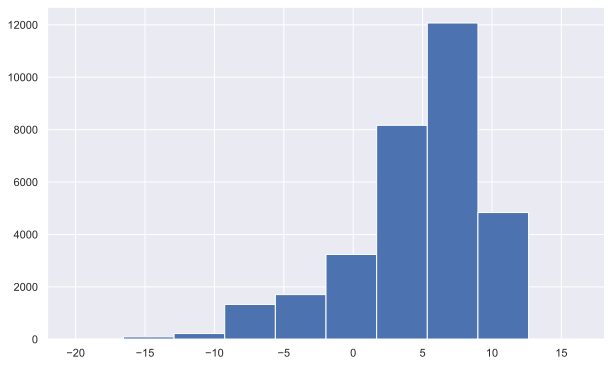

In [45]:
df['Q_Max'].hist(figsize=(10, 6))

<AxesSubplot: >

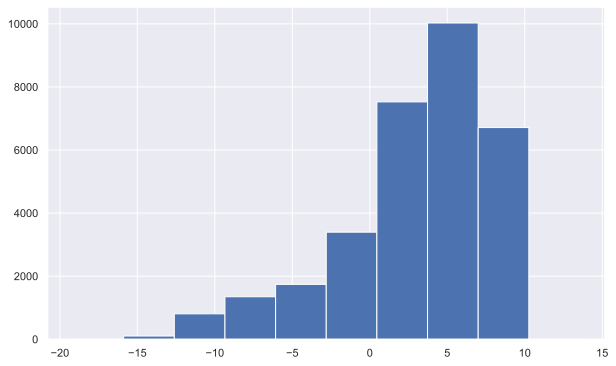

In [46]:
df['Y'].hist(figsize=(10, 6))

In [47]:
dx = pd.read_csv("Experience Replay Dataset.csv")
dx

Unnamed: 0  Epochs                                      Current_State  \
0                0    4500  [8.0077332e-03 9.5185479e-03 2.7466935e-04 4.1...   
1                1    4500  [7.2316937e-03 4.2586084e-03 7.8428704e-03 6.5...   
2                2    4500  [3.2539605e-03 9.7015774e-04 7.2274408e-03 7.5...   
3                3    4500  [7.0253229e-03 2.6434937e-03 4.1451245e-03 5.0...   
4                4    4500  [7.7678319e-03 6.3852174e-03 7.4349227e-03 9.1...   
...            ...     ...                                                ...   
443195      443195    4999  [1.8970773e-03 6.6727498e-03 1.0092647e+00 7.1...   
443196      443196    4999  [6.2436424e-03 9.4558615e-03 8.2083195e-03 8.3...   
443197      443197    4999  [2.2087647e-03 3.0213550e-03 3.7028061e-03 5.4...   
443198      443198    4999  [9.3401410e-03 1.3026751e-03 1.8482549e-03 9.4...   
443199      443199    4999  [3.0124725e-03 4.7256197e-03 9.2271147e-03 4.4...   

        Action  Reward                                         Next_State  \
0          2.0    -1.0  [2.0411045e-03 4.5970655e-03 1.8630754e-03 7.8...   
1          0.0    -1.0  [6.5371590e-03 2.8671831e-04 1.2923105e-04 1.2...   
2          3.0    -1.0  [4.8687514e-03 6.1605820e-03 3.0966785e-03 2.8...   
3          3.0    -1.0  [8.3364444e-03 3.0398597e-03 4.9631037e-03 6.7...   
4          1.0    -1.0  [5.7703941e-03 2.2664063e-03 5.3195155e-04 8.4...   
...        ...     ...                                                ...   
443195     1.0   -10.0  [5.6423130e-03 3.3716604e-03 4.4297050e-03 2.8...   
443196     2.0    -1.0  [2.1442291e-03 2.8203957e-04 6.3584824e-03 5.9...   
443197     2.0    -1.0  [6.6556972e-03 8.2895774e-03 4.5121717e-03 8.3...   
443198     0.0    -1.0  [7.0704881e-04 8.9259529e-03 4.7548045e-03 1.4...   
443199     0.0    10.0  [9.8838080e-03 4.2726030e-03 3.0492141e-03 5.8...   

        Done_Boolean                                      Q-Current  \
0                0.0      [4.3824067 3.251664  4.6633377 6.3426304]   
1                0.0  [8.301725   0.60131323 6.3039174  4.110693  ]   
2                0.0      [2.126464  1.0499609 2.239248  1.1695688]   
3                0.0      [2.6179202 3.7666523 2.4381506 4.9389353]   
4                0.0      [2.034112  4.4193277 4.04026   1.9478679]   
...              ...                                            ...   
443195           0.0  [-2.6020896 -8.185914  -3.6095724 -3.681721 ]   
443196           0.0      [3.105644  4.960172  4.994894  3.1819112]   
443197           0.0  [5.8290334  3.2023811  5.9338555  0.15436226]   
443198           0.0      [7.9756384 5.1795044 7.2091713 6.2919846]   
443199           1.0      [9.615968  7.7658367 5.900399  5.5436554]   

                                               Q-Next          Y         X  
0           [4.223745  3.1851935 4.5819945 6.2175064]   4.595756  4.663338  
1       [10.371106   5.831517   8.135586   4.8211718]   8.333995  8.301725  
2           [2.1127906 1.0743947 2.2515953 1.2407337]   1.026436  1.169569  
3           [3.5367153 6.892476  3.1914701 5.3697224]   5.203228  4.938935  
4           [3.0766172 4.379309  6.116813  4.5215044]   4.505132  4.419328  
...                                               ...        ...       ...  
443195  [-6.1712103 -1.0318992  1.5723869 -3.768174 ]  -8.584852 -8.185914  
443196      [3.3093066 6.637617  6.585969  4.787982 ]   4.973855  4.994894  
443197      [7.683959  4.275585  7.29659   4.1320457]   5.915563  5.933856  
443198  [ 6.755589   5.8122826 10.087701   7.892994 ]   8.078931  7.975638  
443199      [8.74706   8.320608  7.0554957 6.709067 ]  10.000000  9.615968  

[443200 rows x 11 columns]

In [48]:
kk = pd.merge(df, dx.rename(columns={'X':'Q_Max'}), on='Q_Max',  how='left')
kk

Epochs_x  Current_State_x  Pit_Position  Goal_Position  Wall_Position  \
0             0                7            11              3              1   
1             1               10             7              6             11   
2             1                9             7              6             11   
3             1               13             7              6             11   
4             1               12             7              6             11   
...         ...              ...           ...            ...            ...   
31710      4997                9            14             13              2   
31711      4998                6             7             11              3   
31712      4998               10             7             11              3   
31713      4999                2             4             10              3   
31714      4999                6             4             10              3   

       Action_x  Reward_x  Next_State_x  Epsilon_Boolean      Q_Max  ...  \
0             1       -10            11                1   0.043044  ...   
1             2        -1             9                0   0.078250  ...   
2             1        -1            13                1   0.060239  ...   
3             2        -1            12                0   0.036515  ...   
4             1        -1            12                1   0.071071  ...   
...         ...       ...           ...              ...        ...  ...   
31710         1        10            13                0  10.246982  ...   
31711         1        -1            10                0   7.658999  ...   
31712         3        10            11                0  10.090532  ...   
31713         1        -1             6                0   7.486929  ...   
31714         1        10            10                0   9.905152  ...   

       Unnamed: 0  Epochs_y  Current_State_y  Action_y  Reward_y  \
0             NaN       NaN              NaN       NaN       NaN   
1             NaN       NaN              NaN       NaN       NaN   
2             NaN       NaN              NaN       NaN       NaN   
3             NaN       NaN              NaN       NaN       NaN   
4             NaN       NaN              NaN       NaN       NaN   
...           ...       ...              ...       ...       ...   
31710         NaN       NaN              NaN       NaN       NaN   
31711         NaN       NaN              NaN       NaN       NaN   
31712         NaN       NaN              NaN       NaN       NaN   
31713         NaN       NaN              NaN       NaN       NaN   
31714         NaN       NaN              NaN       NaN       NaN   

       Next_State_y  Done_Boolean  Q-Current  Q-Next  Y_y  
0               NaN           NaN        NaN     NaN  NaN  
1               NaN           NaN        NaN     NaN  NaN  
2               NaN           NaN        NaN     NaN  NaN  
3               NaN           NaN        NaN     NaN  NaN  
4               NaN           NaN        NaN     NaN  NaN  
...             ...           ...        ...     ...  ...  
31710           NaN           NaN        NaN     NaN  NaN  
31711           NaN           NaN        NaN     NaN  NaN  
31712           NaN           NaN        NaN     NaN  NaN  
31713           NaN           NaN        NaN     NaN  NaN  
31714           NaN           NaN        NaN     NaN  NaN  

[31715 rows x 30 columns]

In [49]:
X = pc[['Next_State','Pit_Position', 'Goal_Position', 'Wall_Position']].values
y = pc[['Y']].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [51]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor2.predict(X_test)

In [52]:
calculate_smape(y_test, y_pred)

61.47

In [53]:
x_train_full, x_test, y_train_full, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_full, y_train_full)

In [54]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]),
                            tf.keras.layers.Dense(1)])

In [55]:
model2.compile(loss = tf.losses.mean_squared_error,
             optimizer = 'sgd')

In [56]:
hostory = model2.fit(x_train, y_train, epochs=20,
                   validation_data=(x_validation, y_validation))

Epoch 1/20
187/187 [==============================] - 1s 3ms/step - loss: 46.5397 - val_loss: 15.9611
Epoch 2/20
187/187 [==============================] - 0s 2ms/step - loss: 18.2971 - val_loss: 15.1974
Epoch 3/20
187/187 [==============================] - 0s 2ms/step - loss: 18.0935 - val_loss: 15.4656
Epoch 4/20
187/187 [==============================] - 0s 2ms/step - loss: 18.0724 - val_loss: 15.1354
Epoch 5/20
187/187 [==============================] - 0s 2ms/step - loss: 18.0607 - val_loss: 15.1658
Epoch 6/20
187/187 [==============================] - 0s 2ms/step - loss: 18.0674 - val_loss: 15.0949
Epoch 7/20
187/187 [==============================] - 0s 2ms/step - loss: 18.1051 - val_loss: 15.2546
Epoch 8/20
187/187 [==============================] - 0s 2ms/step - loss: 18.0734 - val_loss: 15.5345
Epoch 9/20
187/187 [==============================] - 0s 2ms/step - loss: 18.0274 - val_loss: 16.0190
Epoch 10/20
187/187 [==============================] - 0s 2ms/step - loss: 18.0820

In [57]:
mean_squared_error_test = model2.evaluate(x_test, y_test)
y_pred = model2.predict(x_test)
y_pred

63/63 [==============================] - 0s 985us/step


array([[5.3123326],
       [5.3123326],
       [5.3123326],
       ...,
       [5.3123326],
       [5.3123326],
       [2.9117515]], dtype=float32)

In [58]:
calculate_smape(y_test, y_pred)

59.56

In [65]:
pc = df[df["Epsilon_Boolean"] == 0]
pc

Epochs  Current_State  Pit_Position  Goal_Position  Wall_Position  \
1           1             10             7              6             11   
3           1             13             7              6             11   
5           1             12             7              6             11   
6           1             12             7              6             11   
8           1             13             7              6             11   
...       ...            ...           ...            ...            ...   
31666    4997              9            14             13              2   
31667    4998              6             7             11              3   
31668    4998             10             7             11              3   
31669    4999              2             4             10              3   
31670    4999              6             4             10              3   

       Action  Reward  Next_State  Epsilon_Boolean      Q_Max  Q1_Current  \
1           2      -1           9                0   0.078250   -0.000880   
3           2      -1          12                0   0.036515   -0.005095   
5           2      -1          12                0   0.071545   -0.009119   
6           2      -1          12                0   0.071226   -0.008679   
8           2      -1          12                0   0.036465   -0.004332   
...       ...     ...         ...              ...        ...         ...   
31666       1      10          13                0  10.246982    7.035300   
31667       1      -1          10                0   7.658999    4.065030   
31668       3      10          11                0  10.090532    5.825209   
31669       1      -1           6                0   7.486929    5.939125   
31670       1      10          10                0   9.905152    4.984419   

       Q2_Current  Q3_Current  Q4_Current   Q1_Next   Q2_Next   Q3_Next  \
1       -0.004697    0.078250    0.034444 -0.008500  0.002680  0.060239   
3        0.020549    0.036515    0.025434 -0.009358 -0.001137  0.071071   
5       -0.001004    0.071545    0.045516 -0.008679 -0.001170  0.071226   
6       -0.001170    0.071226    0.045747 -0.008761 -0.001336  0.071332   
8        0.020674    0.036465    0.025803 -0.008627 -0.000839  0.071214   
...           ...         ...         ...       ...       ...       ...   
31666   10.246982    6.672619    7.622937  7.016226  8.598672  9.198164   
31667    7.658999    3.078013    6.122554  5.829938  7.685379  5.881467   
31668    7.686722    5.884451   10.090532  1.755159  7.857297  7.393235   
31669    7.486929    6.003288    5.550877  4.980225  9.909752  6.689217   
31670    9.905152    6.687171    7.627537  4.947731  8.425474  7.928879   

         Q4_Next  Q_Next_Max          Y  
1       0.023245    0.060239  -0.945785  
3       0.045389    0.071071  -0.936036  
5       0.045747    0.071226  -0.935897  
6       0.045629    0.071332  -0.935801  
8       0.045628    0.071214  -0.935907  
...          ...         ...        ...  
31666   5.770725    8.598672  10.000000  
31667  10.084847    7.685379   5.916841  
31668   8.710145    8.710145  10.000000  
31669   7.649198    9.909752   7.918777  
31670   6.909217    8.425474  10.000000  

[22296 rows x 20 columns]

In [67]:
pc = pc.drop_duplicates(keep='last',subset=['Next_State', 'Pit_Position', 'Goal_Position', 'Wall_Position'])
pc

Epochs  Current_State  Pit_Position  Goal_Position  Wall_Position  \
1           1             10             7              6             11   
8           1             13             7              6             11   
11          1              8             7              6             11   
26          1              0             7              6             11   
30          1              2             7              6             11   
...       ...            ...           ...            ...            ...   
31666    4997              9            14             13              2   
31667    4998              6             7             11              3   
31668    4998             10             7             11              3   
31669    4999              2             4             10              3   
31670    4999              6             4             10              3   

       Action  Reward  Next_State  Epsilon_Boolean      Q_Max  Q1_Current  \
1           2      -1           9                0   0.078250   -0.000880   
8           2      -1          12                0   0.036465   -0.004332   
11          2      -1           8                0   0.051388   -0.003160   
26          2      -1           0                0   0.063599   -0.002512   
30          2      -1           1                0   0.061208   -0.010212   
...       ...     ...         ...              ...        ...         ...   
31666       1      10          13                0  10.246982    7.035300   
31667       1      -1          10                0   7.658999    4.065030   
31668       3      10          11                0  10.090532    5.825209   
31669       1      -1           6                0   7.486929    5.939125   
31670       1      10          10                0   9.905152    4.984419   

       Q2_Current  Q3_Current  Q4_Current   Q1_Next   Q2_Next   Q3_Next  \
1       -0.004697    0.078250    0.034444 -0.008500  0.002680  0.060239   
8        0.020674    0.036465    0.025803 -0.008627 -0.000839  0.071214   
11       0.004023    0.051388    0.037469 -0.003592  0.003660  0.051374   
26       0.004822    0.063599    0.023316 -0.001985  0.005330  0.063953   
30       0.004266    0.061208    0.019363 -0.006300  0.007557  0.048233   
...           ...         ...         ...       ...       ...       ...   
31666   10.246982    6.672619    7.622937  7.016226  8.598672  9.198164   
31667    7.658999    3.078013    6.122554  5.829938  7.685379  5.881467   
31668    7.686722    5.884451   10.090532  1.755159  7.857297  7.393235   
31669    7.486929    6.003288    5.550877  4.980225  9.909752  6.689217   
31670    9.905152    6.687171    7.627537  4.947731  8.425474  7.928879   

         Q4_Next  Q_Next_Max          Y  
1       0.023245    0.060239  -0.945785  
8       0.045628    0.071214  -0.935907  
11      0.037539    0.051374  -0.953763  
26      0.023722    0.063953  -0.942442  
30      0.024940    0.048233  -0.956590  
...          ...         ...        ...  
31666   5.770725    8.598672  10.000000  
31667  10.084847    7.685379   5.916841  
31668   8.710145    8.710145  10.000000  
31669   7.649198    9.909752   7.918777  
31670   6.909217    8.425474  10.000000  

[9929 rows x 20 columns]

In [68]:
pc.describe()

Epochs  Current_State  Pit_Position  Goal_Position  Wall_Position  \
count  9929.000000    9929.000000   9929.000000    9929.000000    9929.000000   
mean   2590.812368       7.514050      7.457045       7.375466       7.476584   
std    1504.335667       4.255658      4.558510       4.795939       4.556353   
min       1.000000       0.000000      0.000000       0.000000       0.000000   
25%    1272.000000       4.000000      4.000000       3.000000       4.000000   
50%    2684.000000       8.000000      7.000000       7.000000       7.000000   
75%    3934.000000      11.000000     11.000000      12.000000      11.000000   
max    4999.000000      15.000000     15.000000      15.000000      15.000000   

            Action       Reward   Next_State  Epsilon_Boolean        Q_Max  \
count  9929.000000  9929.000000  9929.000000           9929.0  9929.000000   
mean      1.481619     1.422399     7.526337              0.0     6.047908   
std       1.108302     4.798818     4.107262              0.0     3.703897   
min       0.000000   -10.000000     0.000000              0.0   -16.417757   
25%       1.000000    -1.000000     5.000000              0.0     4.478979   
50%       1.000000    -1.000000     8.000000              0.0     6.694736   
75%       2.000000    -1.000000    10.000000              0.0     8.551612   
max       3.000000    10.000000    15.000000              0.0    15.743462   

        Q1_Current   Q2_Current   Q3_Current   Q4_Current      Q1_Next  \
count  9929.000000  9929.000000  9929.000000  9929.000000  9929.000000   
mean      4.152138     4.145836     4.203146     4.198341     4.869562   
std       3.701244     3.711832     3.750970     3.681645     3.762490   
min     -18.165716   -21.839687   -20.069635   -18.327724   -20.170074   
25%       2.489365     2.489553     2.544850     2.557856     3.253911   
50%       4.638148     4.683805     4.773585     4.720899     5.612124   
75%       6.614887     6.537173     6.662369     6.605361     7.431413   
max      13.129607    12.275242    12.540159    15.743462    13.102048   

           Q2_Next      Q3_Next      Q4_Next   Q_Next_Max            Y  
count  9929.000000  9929.000000  9929.000000  9929.000000  9929.000000  
mean      4.783613     4.959973     4.904194     5.695894     5.046236  
std       3.765014     3.829562     3.746645     3.682222     4.399733  
min     -21.879450   -20.766716   -20.801014   -20.170074   -19.153067  
25%       3.242533     3.367848     3.397068     4.395611     3.075679  
50%       5.567991     5.805697     5.696558     6.582928     5.477848  
75%       7.248453     7.511537     7.334283     8.004675     8.396983  
max      13.971446    12.166435    15.716039    15.716039    13.144435

In [69]:
X = pc[['Next_State','Pit_Position', 'Goal_Position', 'Wall_Position', 'Reward']].values
y = pc[['Y']].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

In [71]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor2.predict(X_test)

In [72]:
calculate_smape(y_test, y_pred)

52.54

In [73]:
x_train_full, x_test, y_train_full, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_full, y_train_full)

In [74]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]),
                            tf.keras.layers.Dense(1)])

In [75]:
model2.compile(loss = tf.losses.mean_squared_error,
             optimizer = 'sgd')

In [76]:
hostory = model2.fit(x_train, y_train, epochs=20,
                   validation_data=(x_validation, y_validation))

Epoch 1/20
187/187 [==============================] - 1s 2ms/step - loss: 127.4698 - val_loss: 9.6252
Epoch 2/20
187/187 [==============================] - 0s 1ms/step - loss: 8.8870 - val_loss: 9.2863
Epoch 3/20
187/187 [==============================] - 0s 2ms/step - loss: 8.6282 - val_loss: 9.0006
Epoch 4/20
187/187 [==============================] - 0s 2ms/step - loss: 8.4585 - val_loss: 9.5578
Epoch 5/20
187/187 [==============================] - 0s 2ms/step - loss: 8.4736 - val_loss: 8.3708
Epoch 6/20
187/187 [==============================] - 0s 2ms/step - loss: 8.4628 - val_loss: 10.2791
Epoch 7/20
187/187 [==============================] - 0s 2ms/step - loss: 8.4794 - val_loss: 10.6019
Epoch 8/20
187/187 [==============================] - 0s 2ms/step - loss: 8.4652 - val_loss: 8.8651
Epoch 9/20
187/187 [==============================] - 0s 2ms/step - loss: 8.4272 - val_loss: 8.6656
Epoch 10/20
187/187 [==============================] - 0s 2ms/step - loss: 8.3972 - val_loss: 8.

In [77]:
mean_squared_error_test = model2.evaluate(x_test, y_test)
y_pred = model2.predict(x_test)
y_pred

63/63 [==============================] - 0s 829us/step


array([[4.867497 ],
       [4.867497 ],
       [4.867497 ],
       ...,
       [9.965551 ],
       [4.7520165],
       [2.8518584]], dtype=float32)

In [78]:
calculate_smape(y_test, y_pred)

45.69

In [79]:
import numpy as np
import random
import sys

def randPair(s,e):
    return np.random.randint(s,e), np.random.randint(s,e)

class BoardPiece:

    def __init__(self, name, code, pos):
        self.name = name #name of the piece
        self.code = code #an ASCII character to display on the board
        self.pos = pos #2-tuple e.g. (1,4)

class BoardMask:

    def __init__(self, name, mask, code):
        self.name = name
        self.mask = mask
        self.code = code

    def get_positions(self): #returns tuple of arrays
        return np.nonzero(self.mask)

def zip_positions2d(positions): #positions is tuple of two arrays
    x,y = positions
    return list(zip(x,y))

class GridBoard:

    def __init__(self, size=4):
        self.size = size #Board dimensions, e.g. 4 x 4
        self.components = {} #name : board piece
        self.masks = {}

    def addPiece(self, name, code, pos=(0,0)):
        newPiece = BoardPiece(name, code, pos)
        self.components[name] = newPiece

    #basically a set of boundary elements
    def addMask(self, name, mask, code):
        #mask is a 2D-numpy array with 1s where the boundary elements are
        newMask = BoardMask(name, mask, code)
        self.masks[name] = newMask

    def movePiece(self, name, pos):
        move = True
        for _, mask in self.masks.items():
            if pos in zip_positions2d(mask.get_positions()):
                move = False
        if move:
            self.components[name].pos = pos

    def delPiece(self, name):
        del self.components['name']

    def render(self):
        dtype = '<U2'
        displ_board = np.zeros((self.size, self.size), dtype=dtype)
        displ_board[:] = ' '

        for name, piece in self.components.items():
            displ_board[piece.pos] = piece.code

        for name, mask in self.masks.items():
            displ_board[mask.get_positions()] = mask.code

        return displ_board

    def render_np(self):
        num_pieces = len(self.components) + len(self.masks)
        displ_board = np.zeros((num_pieces, self.size, self.size), dtype=np.uint8)
        layer = 0
        for name, piece in self.components.items():
            pos = (layer,) + piece.pos
            displ_board[pos] = 1
            layer += 1

        for name, mask in self.masks.items():
            x,y = self.masks['boundary'].get_positions()
            z = np.repeat(layer,len(x))
            a = (z,x,y)
            displ_board[a] = 1
            layer += 1
        return displ_board

def addTuple(a,b):
    return tuple([sum(x) for x in zip(a,b)])

In [122]:
class Gridworld:

    def __init__(self, size=4, mode='static'):
        if size >= 4:
            self.board = GridBoard(size=size)
        else:
            print("Minimum board size is 4. Initialized to size 4.")
            self.board = GridBoard(size=4)

        #Add pieces, positions will be updated later
        self.board.addPiece('Player','P',(1,1))
        self.board.addPiece('Goal','+',(0,0))
        self.board.addPiece('Pit','-',(2,))
        self.board.addPiece('Wall','W',(1,1))

        if mode == 'static':
            self.initGridStatic()
        elif mode == 'player':
            self.initGridPlayer()
        else:
            self.initGridRand()

    #Initialize stationary grid, all items are placed deterministically
    def initGridStatic(self):
        #Setup static pieces
        self.board.components['Player'].pos = (2,2) #Row, Column
        self.board.components['Goal'].pos = (0,1)
        self.board.components['Pit'].pos = (3,3)
        self.board.components['Wall'].pos = (1,1)

    #Check if board is initialized appropriately (no overlapping pieces)
    #also remove impossible-to-win boards
    def validateBoard(self):
        valid = True

        player = self.board.components['Player']
        goal = self.board.components['Goal']
        wall = self.board.components['Wall']
        pit = self.board.components['Pit']

        all_positions = [piece for name,piece in self.board.components.items()]
        all_positions = [player.pos, goal.pos, wall.pos, pit.pos]
        if len(all_positions) > len(set(all_positions)):
            return False

        corners = [(0,0),(0,self.board.size), (self.board.size,0), (self.board.size,self.board.size)]
        #if player is in corner, can it move? if goal is in corner, is it blocked?
        if player.pos in corners or goal.pos in corners:
            val_move_pl = [self.validateMove('Player', addpos) for addpos in [(0,1),(1,0),(-1,0),(0,-1)]]
            val_move_go = [self.validateMove('Goal', addpos) for addpos in [(0,1),(1,0),(-1,0),(0,-1)]]
            if 0 not in val_move_pl or 0 not in val_move_go:
                #print(self.display())
                #print("Invalid board. Re-initializing...")
                valid = False

        return valid

    #Initialize player in random location, but keep wall, goal and pit stationary
    def initGridPlayer(self):
        #height x width x depth (number of pieces)
        self.initGridStatic()
        #place player
        self.board.components['Player'].pos = randPair(0,self.board.size)

        if (not self.validateBoard()):
            #print('Invalid grid. Rebuilding..')
            self.initGridPlayer()

    #Initialize grid so that goal, pit, wall, player are all randomly placed
    def initGridRand(self):
        #height x width x depth (number of pieces)
        self.board.components['Player'].pos = randPair(0,self.board.size)
        self.board.components['Goal'].pos = randPair(0,self.board.size)
        self.board.components['Pit'].pos = randPair(0,self.board.size)
        self.board.components['Wall'].pos = randPair(0,self.board.size)

        if (not self.validateBoard()):
            #print('Invalid grid. Rebuilding..')
            self.initGridRand()

    def validateMove(self, piece, addpos=(0,0)):
        outcome = 0 #0 is valid, 1 invalid, 2 lost game
        pit = self.board.components['Pit'].pos
        wall = self.board.components['Wall'].pos
        new_pos = addTuple(self.board.components[piece].pos, addpos)
        if new_pos == wall:
            outcome = 1 #block move, player can't move to wall
        elif max(new_pos) > (self.board.size-1):    #if outside bounds of board
            outcome = 1
        elif min(new_pos) < 0: #if outside bounds
            outcome = 1
        elif new_pos == pit:
            outcome = 2

        return outcome

    def makeMove(self, action):
        #need to determine what object (if any) is in the new grid spot the player is moving to
        #actions in {u,d,l,r}
        def checkMove(addpos):
            if self.validateMove('Player', addpos) in [0,2]:
                new_pos = addTuple(self.board.components['Player'].pos, addpos)
                self.board.movePiece('Player', new_pos)

        if action == 'u': #up
            checkMove((-1,0))
        elif action == 'd': #down
            checkMove((1,0))
        elif action == 'l': #left
            checkMove((0,-1))
        elif action == 'r': #right
            checkMove((0,1))
        else:
            pass

    def reward(self):
        if (self.board.components['Player'].pos == self.board.components['Pit'].pos):
            return -10
        elif (self.board.components['Player'].pos == self.board.components['Goal'].pos):
            return 10
        else:
            return -1

    def display(self):
        return self.board.render()

In [123]:
action_set = {
    0: 'u',
    1: 'd',
    2: 'l',
    3: 'r',
}

In [124]:
def from2dto1d(pos):
    if pos == '(0, 0)':
        return 0
    if pos == '(0, 1)':
        return 1
    if pos == '(0, 2)':
        return 2
    if pos == '(0, 3)':
        return 3
    if pos == '(1, 0)':
        return 4
    if pos == '(1, 1)':
        return 5
    if pos == '(1, 2)':
        return 6
    if pos == '(1, 3)':
        return 7
    if pos == '(2, 0)':
        return 8
    if pos == '(2, 1)':
        return 9
    if pos == '(2, 2)':
        return 10
    if pos == '(2, 3)':
        return 11
    if pos == '(3, 0)':
        return 12
    if pos == '(3, 1)':
        return 13
    if pos == '(3, 2)':
        return 14
    if pos == '(3, 3)':
        return 15

In [125]:
test_game = Gridworld(mode='random')
x = from2dto1d((str(test_game.board.components['Player'].pos)))
(str(test_game.board.components['Player'].pos))


'(0, 1)'

In [126]:
def test_model(model, model_b, matrix, mode='static', display=True):
    i = 0
    test_game = Gridworld(mode=mode)
#     state_ = test_game.board.render_np().reshape(1,64) + np.random.rand(1,64)/10.0
#     state = torch.from_numpy(state_).float()
    if display:
        print("Initial State:")
        print(test_game.display())
    status = 1
    j = 0
    while(status == 1): #A
        p_curr = from2dto1d((str(test_game.board.components['Player'].pos)))
        pi = from2dto1d((str(test_game.board.components['Pit'].pos)))
        g = from2dto1d((str(test_game.board.components['Goal'].pos)))
        w = from2dto1d((str(test_game.board.components['Wall'].pos)))
        
        q_value = []
        q_value_next = []

        test_game.makeMove('u')
        p = from2dto1d((str(test_game.board.components['Player'].pos)))
        q_value.append(model.predict([[p,pi,g,w]])[0][0])
        q_value_next.append(model_b.predict([[p,pi,g,w]])[0][0])
#         q_value.append(model.predict([[p,pi,g,w]])[0][0])
        if p_curr != p:
            test_game.makeMove('d')
        
        test_game.makeMove('d')
        p = from2dto1d((str(test_game.board.components['Player'].pos)))
        q_value.append(model.predict([[p,pi,g,w]])[0][0])
#         q_value.append(model.predict([[p,pi,g,w]])[0][0])
        q_value_next.append(model_b.predict([[p,pi,g,w]])[0][0])
        if p_curr != p:
            test_game.makeMove('u')
        
        test_game.makeMove('l')
        p = from2dto1d((str(test_game.board.components['Player'].pos)))
        q_value.append(model.predict([[p,pi,g,w]])[0][0])
#         q_value.append(model.predict([[p,pi,g,w]])[0][0])
        q_value_next.append(model_b.predict([[p,pi,g,w]])[0][0])
        if p_curr != p:
            test_game.makeMove('r')
        
        test_game.makeMove('r')
        p = from2dto1d((str(test_game.board.components['Player'].pos)))
        q_value.append(model.predict([[p,pi,g,w]])[0][0])
#         q_value.append(model.predict([[p,pi,g,w]])[0][0])
    
        q_value_next.append(model_b.predict([[p,pi,g,w]])[0][0])
        if p_curr != p:
            test_game.makeMove('l')
        
        print(q_value)
        
        matrix[j][:4] = q_value
        matrix[j][4:] = q_value_next
        action_ = np.argmax(q_value)
        print(action_)
        action = action_set[action_]
        
        j += 1
        if display:
            print('Move #: %s; Taking action: %s' % (i, action))
        test_game.makeMove(action)
#         state_ = test_game.board.render_np().reshape(1,64) + np.random.rand(1,64)/10.0
#         state = torch.from_numpy(state_).float()
        if display:
            print(test_game.display())
        reward = test_game.reward()
        if reward != -1:
            if reward > 0:
                status = 2
                if display:
                    print("Game won! Reward: %s" % (reward,))
            else:
                status = 0
                if display:
                    print("Game LOST. Reward: %s" % (reward,))
        i += 1
        if (i > 15):
            if display:
                print("Game lost; too many moves.")
            break
    
    win = True if status == 2 else False
    return win

In [127]:
h = 0
w, h = 8, 300000
matrix = [[0 for x in range(w)] for y in range(h)] 

In [128]:
test_model(regressor1,regressor2,matrix)

Initial State:
[[' ' '+' ' ' ' ']
 [' ' 'W' ' ' ' ']
 [' ' ' ' 'P' ' ']
 [' ' ' ' ' ' '-']]


ValueError: X has 4 features, but LinearRegression is expecting 5 features as input.

In [113]:
matrix

[[3.5691860711103227,
  3.5652343313380204,
  3.570174006053398,
  3.568198136167247],
 [3.5741257458257003,
  3.5662222662810956,
  3.5711619409964737,
  3.5691860711103227],
 [3.578077485598003, 3.570174006053398, 3.575113680768776, 3.5741257458257003],
 [3.578077485598003,
  3.5741257458257003,
  10.374800486968553,
  3.5770895506549274],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 

In [86]:
win_num = 0
for i in range(0,10):
    max_games = 1000
    wins = 0
    for i in range(max_games):
        win = test_model(regressor1, regressor2, mode='random', display=False)
        if win:
            wins += 1
    win_perc = float(wins) / float(max_games)
    win_num = win_num + win_perc
    print("Games played: {0}, # of wins: {1}".format(max_games,wins))
    print(win_perc)
    print(win_num)
win_num = win_num / 10
print("Win percentage: {}%".format(win_num*100))

[6.704943230246027, 6.512759021192956, 6.753425921403189, 6.704943230246027]
2
[6.753425921403189, 65.95880425187606, 6.802083268117903, 6.704943230246027]
1
[6.534108065689353, 6.157498219906069, 6.344405898337262, 6.297416995393127]
0
[6.534108065689353, 6.344405898337262, 6.534108065689353, 18.053064983999825]
3
[65.14343361743967, 6.118803898807859, 18.599972282726178, 6.072659568460958]
0
[6.164531900627167, 5.980312787517204, 5.980312787517204, 5.934694648133601]
0
[6.351545502658037, 5.980312787517204, 6.164531900627167, 6.118215139013343]
0
[6.541353593609805, 6.164531900627167, 6.351545502658037, 6.351545502658037]
0
[6.541353593609805, 6.351545502658037, 6.541353593609805, 6.4936395875355295]
0
[6.541353593609805, 6.351545502658037, 6.541353593609805, 6.4936395875355295]
0
[6.541353593609805, 6.351545502658037, 6.541353593609805, 6.4936395875355295]
0
[6.541353593609805, 6.351545502658037, 6.541353593609805, 6.4936395875355295]
0
[6.541353593609805, 6.351545502658037, 6.54135

0
[6.868582258512227, 6.674050041054762, 6.868582258512227, 6.868582258512227]
0
[6.868582258512227, 6.674050041054762, 6.868582258512227, 6.868582258512227]
0
[6.868582258512227, 6.674050041054762, 6.868582258512227, 6.868582258512227]
0
[6.868582258512227, 6.674050041054762, 6.868582258512227, 6.868582258512227]
0
[6.868582258512227, 6.674050041054762, 6.868582258512227, 6.868582258512227]
0
[6.868582258512227, 6.674050041054762, 6.868582258512227, 6.868582258512227]
0
[6.868582258512227, 6.674050041054762, 6.868582258512227, 6.868582258512227]
0
[6.868582258512227, 6.674050041054762, 6.868582258512227, 6.868582258512227]
0
[64.53282020911381, 5.751967123140943, 5.932661932554263, 5.932661932554263]
0
[6.2199038710118035, 6.034852986188944, 6.034852986188944, 5.989026903877122]
0
[6.407749244755562, 6.034852986188944, 6.2199038710118035, 6.173379166469752]
0
[6.598389107420227, 6.2199038710118035, 6.407749244755562, 6.360525917983289]
0
[6.598389107420227, 6.407749244755562, 6.598389

[18.08928064431439, 6.090165673665276, 6.27605628115822, 6.229321645948651]
0
[6.202100515049503, 6.017316658559128, 6.0632506393453856, 5.9715573333304235]
0
[6.389678860460784, 6.017316658559128, 6.24873311806599, 6.155642567590577]
0
[6.580051694792967, 6.202100515049503, 6.4370100857074934, 18.295283219572937]
3
[6.684075485749035, 6.303104508174831, 6.539901452477032, 65.59023925004617]
3
[6.298471589264617, 5.92881654970099, 6.158541032746582, 6.112246825022351]
0
[6.487490842427781, 6.112246825022351, 18.290287245346867, 6.251653414867714]
2
[65.3299180923613, 5.991657102449905, 6.1760495347741085, 6.129689443356721]
0
[5.922843746070394, 5.7422996745598285, 5.7422996745598285, 5.7422996745598285]
0
[6.106182306501858, 5.7422996745598285, 5.968416402841927, 5.922843746070394]
0
[18.380823575362864, 5.922843746070394, 6.152453585503616, 6.106182306501858]
0
[6.623329456102017, 6.244119049489366, 6.432327008335242, 18.223308564799908]
3
[6.6602394985413875, 6.468701699584458, 6.70

[6.496368628100194, 6.307219132062012, 6.544092641003628, 6.496368628100194]
2
[6.544092641003628, 65.3010993047245, 6.5919913094646185, 6.496368628100194]
1
[6.325359788452372, 5.954904642824029, 6.18512919216007, 6.138734971177753]
0
[6.325359788452372, 6.138734971177753, 6.372452631664923, 6.325359788452372]
2
[6.372452631664923, 6.18512919216007, 18.164800867670536, 6.325359788452372]
2
[6.412030300785433, 6.224121720528111, 6.270836882256111, 18.57835009713461]
3
[6.535753703537278, 6.159095731732296, 6.393197047428736, 6.346027473174337]
0
[66.48834589578318, 6.346027473174337, 6.583621900021907, 6.535753703537278]
0
[6.228525196785428, 5.860959572286803, 6.043345140075666, 5.997486764792114]
0
[6.416499742416095, 6.043345140075666, 6.228525196785428, 6.181968199271653]
0
[6.416499742416095, 6.228525196785428, 6.416499742416095, 6.369244122672091]
0
[6.416499742416095, 6.228525196785428, 6.416499742416095, 6.369244122672091]
0
[6.416499742416095, 6.228525196785428, 6.416499742416

[6.350895739444257, 6.1638917748762845, 6.398083369480139, 18.36106766085673]
3
[5.991285759735779, 5.809693487132854, 5.854829571947249, 5.809693487132854]
0
[6.175672521259611, 5.809693487132854, 64.27552976006558, 5.991285759735779]
2
[6.147375054798121, 5.963414421177991, 6.009142596246691, 5.917860901666852]
0
[6.334130177339154, 5.963414421177991, 6.147375054798121, 64.48398349615499]
3
[6.394089973825084, 6.02159733517532, 18.448022136606934, 6.2064464100397485]
2
[6.6284297263261225, 6.437353214480939, 66.32580293070583, 6.580398615028494]
2
[6.634091957197105, 6.442933254075364, 6.634091957197105, 6.586040298080336]
0
[6.634091957197105, 6.442933254075364, 6.634091957197105, 6.586040298080336]
0
[6.634091957197105, 6.442933254075364, 6.634091957197105, 6.586040298080336]
0
[6.634091957197105, 6.442933254075364, 6.634091957197105, 6.586040298080336]
0
[6.634091957197105, 6.442933254075364, 6.634091957197105, 6.586040298080336]
0
[6.634091957197105, 6.442933254075364, 6.63409195

[6.593939815304758, 6.403364708844727, 6.593939815304758, 6.546034055353417]
0
[6.593939815304758, 6.403364708844727, 6.593939815304758, 6.546034055353417]
0
[6.593939815304758, 6.403364708844727, 6.593939815304758, 6.546034055353417]
0
[6.593939815304758, 6.403364708844727, 6.593939815304758, 6.546034055353417]
0
[6.593939815304758, 6.403364708844727, 6.593939815304758, 6.546034055353417]
0
[6.593939815304758, 6.403364708844727, 6.593939815304758, 6.546034055353417]
0
[6.593939815304758, 6.403364708844727, 6.593939815304758, 6.546034055353417]
0
[6.593939815304758, 6.403364708844727, 6.593939815304758, 6.546034055353417]
0
[6.286885783458245, 5.917576026505117, 6.147084707919149, 6.054757268680865]
0
[6.286885783458245, 6.100833660521232, 6.333835453086392, 6.240110769387656]
2
[17.991544633884324, 6.147084707919149, 6.333835453086392, 6.286885783458245]
0
[6.817512554259847, 6.4327021130345114, 6.623710089186727, 6.575696111812342]
0
[6.817512554259847, 6.623710089186727, 6.817512554

[6.064896704930762, 5.882183728879971, 5.927599989556332, 5.882183728879971]
0
[6.250404169902452, 5.882183728879971, 6.111011587837351, 64.21623094963753]
3
[6.293712988661822, 6.1075591135939815, 6.153835599024611, 6.061457283720915]
0
[65.71135342891526, 6.1075591135939815, 6.34068809632267, 6.246912536558526]
0
[6.249683352892238, 6.0641866654618575, 6.1102988539831165, 6.01824913249815]
0
[6.437974529243526, 6.0641866654618575, 6.296494163643727, 18.534259091605836]
3
[6.444013870915202, 6.070048105739178, 18.36348444828845, 6.2089753509985135]
2
[6.599083171784061, 6.220577736110997, 6.40843320948708, 6.361207357806722]
0
[6.599083171784061, 6.40843320948708, 6.599083171784061, 6.551158697873483]
0
[6.599083171784061, 6.40843320948708, 6.599083171784061, 6.551158697873483]
0
[6.599083171784061, 6.40843320948708, 6.599083171784061, 6.551158697873483]
0
[6.599083171784061, 6.40843320948708, 6.599083171784061, 6.551158697873483]
0
[6.599083171784061, 6.40843320948708, 6.599083171784

[6.815455257859648, 6.6216822473681844, 6.815455257859648, 6.766750021900451]
0
[6.2396514493678, 5.871752683415479, 6.100379495454005, 64.18175507327672]
3
[6.6728806037728114, 6.292233478509274, 6.528828015117312, 6.433666233801425]
0
[6.6728806037728114, 6.481159796680592, 6.72124744443976, 6.624688418663422]
2
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.6728806037728114]
0
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.6728806037728114]
0
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.6728806037728114]
0
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.6728806037728114]
0
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.6728806037728114]
0
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.6728806037728114]
0
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.6728806037728114]
0
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.6728806037728114]
0
[6.72124744443976, 6.528828015117312, 6.72124744443976, 6.67

[6.565789476288212, 6.188254182401197, 6.422903824398911, 18.319085507903786]
3
[6.064004563283683, 5.88130512896692, 5.88130512896692, 5.836066909281623]
0
[18.454201535898125, 5.88130512896692, 6.064004563283683, 6.018067721368157]
0
[5.996780682428185, 5.815104514410859, 5.815104514410859, 5.770122111300416]
0
[6.181251339366415, 5.815104514410859, 6.042636363326408, 5.951099657087519]
0
[18.251206544637558, 5.996780682428185, 6.227805642494864, 6.134871691795525]
0
[66.25322494039271, 18.412964236064674, 6.5097783568098135, 6.414756017274333]
0
[5.955907416278379, 5.774856217124131, 6.001606854960829, 5.955907416278379]
2
[6.186151165266205, 5.8198570335763575, 6.047480949200837, 5.955907416278379]
0
[6.373489964492479, 6.001606854960829, 64.9102417977008, 6.186151165266205]
2
[66.53840454536659, 6.361499246051534, 6.599380467423412, 6.503704012201989]
0
[6.59231033322028, 6.214002052000897, 6.401758948150138, 6.3545577407764915]
0
[6.59231033322028, 6.401758948150138, 6.6403848183

[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.687841399710148, 6.639595122853739]
0
[6.687841399710148, 6.495904225629847, 6.68784139971

[6.836206414553018, 6.642136510436154, 6.836206414553018, 6.836206414553018]
0
[6.836206414553018, 6.642136510436154, 6.836206414553018, 6.836206414553018]
0
[6.415618389712678, 6.227656850321981, 6.463045413454241, 18.251461264293813]
3
[6.415559316579979, 18.814765880256214, 6.274326832537182, 6.227598648971366]
1
[6.227945658322032, 6.042774281936615, 6.088805142696633, 5.996918076734146]
0
[6.415911523628358, 6.042774281936615, 6.274675141312282, 6.1813908308893435]
0
[6.606671877855587, 6.227945658322032, 6.463339628848828, 18.250966853747435]
3
[6.480113738161339, 18.70465431425552, 6.338168535987588, 64.94794775206765]
3
[6.488257484046173, 6.29922698023904, 65.88078033233103, 6.488257484046173]
2
[5.962498869909537, 5.781346740047003, 63.583638277120876, 5.736495346475255]
2
[6.440975068814396, 6.06709880746175, 6.299461554125481, 6.252639693677619]
0
[6.440975068814396, 6.252639693677619, 6.488495551492479, 6.440975068814396]
2
[6.488495551492479, 6.299461554125481, 6.53619068

0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050764507, 6.485483962225236]
0
[6.533168050764507, 6.343479629952768, 6.533168050

0
[6.5590372745237095, 6.3689709088884285, 6.5590372745237095, 6.51125869977855]
0
[6.5590372745237095, 6.3689709088884285, 6.5590372745237095, 6.51125869977855]
0
[6.5590372745237095, 6.3689709088884285, 6.5590372745237095, 6.51125869977855]
0
[6.5590372745237095, 6.3689709088884285, 6.5590372745237095, 6.51125869977855]
0
[65.1849212317875, 5.9478019815149885, 6.1315234796613804, 6.085331121788446]
0
[6.397536905170274, 6.209842394112065, 65.59099999529451, 6.350351294069389]
2
[6.6709956884639325, 18.384092248445747, 6.526963557814296, 6.479302158712863]
1
[6.732959922369958, 6.732959922369958, 6.7815436184508435, 6.684550881846636]
2
[6.7815436184508435, 6.588256767472657, 6.7815436184508435, 6.732959922369958]
0
[6.7815436184508435, 6.588256767472657, 6.7815436184508435, 6.732959922369958]
0
[6.7815436184508435, 6.588256767472657, 6.7815436184508435, 6.732959922369958]
0
[6.7815436184508435, 6.588256767472657, 6.7815436184508435, 6.732959922369958]
0
[6.7815436184508435, 6.5882567

[6.232080225099586, 5.864408123875084, 6.092893270458725, 6.046846930026882]
0
[6.232080225099586, 6.046846930026882, 6.27882518776165, 6.232080225099586]
2
[6.27882518776165, 6.092893270458725, 6.325744805981276, 6.232080225099586]
2
[6.325744805981276, 6.1391142664481215, 18.243890877281697, 6.27882518776165]
2
Games played: 1000, # of wins: 318
0.318
0.646
[6.529570224072846, 6.153093117060959, 6.339934426106451, 6.292962115508747]
0
[6.529570224072846, 6.339934426106451, 6.529570224072846, 6.481899291244911]
0
[6.529570224072846, 6.339934426106451, 6.529570224072846, 6.481899291244911]
0
[6.529570224072846, 6.339934426106451, 6.529570224072846, 6.481899291244911]
0
[6.529570224072846, 6.339934426106451, 6.529570224072846, 6.481899291244911]
0
[6.529570224072846, 6.339934426106451, 6.529570224072846, 6.481899291244911]
0
[6.529570224072846, 6.339934426106451, 6.529570224072846, 6.481899291244911]
0
[6.529570224072846, 6.339934426106451, 6.529570224072846, 6.481899291244911]
0
[6.529

[6.661561714209721, 6.470004765109791, 6.661561714209721, 6.613410493598406]
0
[6.661561714209721, 6.470004765109791, 6.661561714209721, 6.613410493598406]
0
[6.661561714209721, 6.470004765109791, 6.661561714209721, 6.613410493598406]
0
[6.661561714209721, 6.470004765109791, 6.661561714209721, 6.613410493598406]
0
[6.6011725872337905, 6.222606349986781, 6.410492224149835, 6.363258772272735]
0
[6.794647439238653, 6.410492224149835, 6.6011725872337905, 6.553240513126469]
0
[6.794647439238653, 6.6011725872337905, 6.794647439238653, 6.746016742901101]
0
[6.794647439238653, 6.6011725872337905, 6.794647439238653, 6.746016742901101]
0
[6.794647439238653, 6.6011725872337905, 6.794647439238653, 6.746016742901101]
0
[6.794647439238653, 6.6011725872337905, 6.794647439238653, 6.746016742901101]
0
[6.794647439238653, 6.6011725872337905, 6.794647439238653, 6.746016742901101]
0
[6.794647439238653, 6.6011725872337905, 6.794647439238653, 6.746016742901101]
0
[6.794647439238653, 6.6011725872337905, 6.79

[6.716566022759568, 6.5242141029012375, 6.765090641618045, 6.668216059458652]
2
[6.765090641618045, 6.765090641618045, 6.813789916034075, 6.716566022759568]
2
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.813789916034075, 6.765090641618045]
0
[6.813789916034075, 6.620040751715289, 6.8137899160

[6.603447243741217, 6.412733790100801, 6.603447243741217, 6.603447243741217]
0
[6.3270682411063195, 6.140418033568251, 18.562340232479862, 6.140418033568251]
2
[6.699287159580967, 6.317876563827191, 6.507184617243626, 6.507184617243626]
0
[6.699287159580967, 6.507184617243626, 66.54953647934238, 6.699287159580967]
2
[64.64379294587965, 5.966342489760901, 6.012081868405369, 5.920777766673987]
0
[6.820916052557509, 6.627064868910181, 6.820916052557509, 6.820916052557509]
0
[6.820916052557509, 6.627064868910181, 6.820916052557509, 6.820916052557509]
0
[6.820916052557509, 6.627064868910181, 6.820916052557509, 6.820916052557509]
0
[6.820916052557509, 6.627064868910181, 6.820916052557509, 6.820916052557509]
0
[6.820916052557509, 6.627064868910181, 6.820916052557509, 6.820916052557509]
0
[6.820916052557509, 6.627064868910181, 6.820916052557509, 6.820916052557509]
0
[6.820916052557509, 6.627064868910181, 6.820916052557509, 6.820916052557509]
0
[6.820916052557509, 6.627064868910181, 6.820916052

[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.748896109208227, 6.556078444840824, 6.748896109208227, 6.7004297097800425]
0
[6.051728444901941, 5.869215449888945, 5

[6.7396090594013955, 6.546925069077473, 6.7396090594013955, 6.7396090594013955]
0
[6.586887484963541, 6.396415064807805, 6.396415064807805, 6.349233598662765]
0
[6.780154394040173, 6.396415064807805, 6.586887484963541, 6.539007396588268]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.780154394040173, 6.731575683434682]
0
[6.780154394040173, 6.586887484963541, 6.78015439

[6.340624355701683, 6.15377280460894, 18.218645189727603, 6.293649484592165]
2
[6.381055692951848, 6.193604906246403, 18.47017982509984, 6.147178848463933]
2
[6.259114837408853, 6.073477181020305, 6.119624611781108, 6.073477181020305]
0
[6.447546982718304, 6.073477181020305, 6.305960890399879, 6.259114837408853]
0
[6.638773616948654, 6.259114837408853, 6.447546982718304, 6.447546982718304]
0
[6.638773616948654, 6.447546982718304, 6.687016914400136, 6.638773616948654]
2
[6.687016914400136, 6.687016914400136, 6.735434867409169, 6.638773616948654]
2
[6.735434867409169, 65.90255356511362, 6.784027475975758, 6.687016914400136]
1
[6.7631963266968675, 6.570173010491302, 6.7631963266968675, 6.714678514309143]
0
[6.7631963266968675, 6.570173010491302, 6.7631963266968675, 6.714678514309143]
0
[6.7631963266968675, 6.570173010491302, 6.7631963266968675, 6.714678514309143]
0
[6.7631963266968675, 6.570173010491302, 6.7631963266968675, 6.714678514309143]
0
[6.7631963266968675, 6.570173010491302, 6.76

[6.756306868317798, 6.563382602441726, 6.756306868317798, 6.707813818512443]
0
[6.756306868317798, 6.563382602441726, 6.756306868317798, 6.707813818512443]
0
[6.756306868317798, 6.563382602441726, 6.756306868317798, 6.707813818512443]
0
[6.756306868317798, 6.563382602441726, 6.756306868317798, 6.707813818512443]
0
[6.756306868317798, 6.563382602441726, 6.756306868317798, 6.707813818512443]
0
[6.756306868317798, 6.563382602441726, 6.756306868317798, 6.707813818512443]
0
[6.756306868317798, 6.563382602441726, 6.756306868317798, 6.707813818512443]
0
[6.283067148543524, 6.0970719623356375, 18.637915028291825, 6.051009804677561]
2
[6.8073358228834175, 6.613679102821674, 6.856186641792741, 66.58379015646808]
3
[6.2918583052300745, 63.8999606727499, 6.105732066756489, 6.059637146031987]
1
[6.491545541571211, 18.36348444828845, 6.539251867784775, 6.444013870915202]
1
[6.511599542542898, 18.651264120566722, 6.369308006984231, 6.275320261066243]
1
[6.263819130753109, 6.078111200707733, 18.671106

0
[6.4132724491283275, 6.040213106695817, 6.2720652790344635, 6.1788004434263355]
0
[6.4132724491283275, 6.225345533451619, 18.09605797886623, 6.366028736872819]
2
[17.993027619996514, 6.146217919304995, 6.33295559584087, 6.286009193370565]
0
[5.972900622709192, 5.791589330884034, 5.791589330884034, 5.746698146821641]
0
[6.157006403455244, 5.791589330884034, 6.01866508455937, 5.927310816416565]
0
[6.343906673122206, 5.972900622709192, 6.203469487535654, 6.110717974932397]
0
[6.343906673122206, 6.157006403455244, 18.213082520245134, 6.296919622369133]
2
[6.690392003129032, 65.15664502899362, 6.54614949172306, 6.498417965702848]
1
[6.421866707728323, 6.048553741882729, 6.280564428854554, 6.187236187393153]
0
[6.612714924032476, 6.233812980345077, 65.6688521802508, 6.421866707728323]
2
[6.72882617488806, 6.536297504647017, 6.72882617488806, 66.33776777946156]
3
[6.665874755627123, 18.392595958183396, 6.474255352345852, 6.426787140419429]
1
[6.434092068070045, 6.245858096744221, 6.48158719

[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.752948082389416]
0
[6.801603710786591, 6.60802913054324, 6.801603710786591, 6.75294

[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.782454103388574, 6.782454103388574, 6.782454103388574, 6.7338671401498535]
0
[6.512371866782443, 6.1363982570397475, 

0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.742762610041559, 6.5500332184623415, 6.742762610041559, 6.694318278810418]
0
[6.7314965508021105, 6.349156746187014

[6.411355050553409, 6.038352315260917, 6.270169108137053, 6.223456438446711]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.411355050553409, 6.411355050553409]
0
[6.411355050553409, 6.223456438446711, 6.41135505055

[6.679774277896205, 6.298927696155694, 6.535646893061839, 6.4879537425655]
0
[6.679774277896205, 6.4879537425655, 6.728166050622774, 6.631557160727196]
2
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774, 6.679774277896205]
0
[6.728166050622774, 6.535646893061839, 6.728166050622774

[6.385892283327722, 6.01364208653738, 6.1983699404721015, 6.151925993652083]
0
[6.576209115104249, 6.1983699404721015, 6.385892283327722, 18.30169205685152]
3
[6.21853769546112, 5.851271369527508, 6.079502906554344, 5.987686325070939]
0
[6.406362591809278, 6.033507288033863, 6.265231936211825, 6.1720181102679685]
0
[6.406362591809278, 6.21853769546112, 6.453755454790211, 18.267081696211417]
3
[6.6331129335869266, 6.253618433683913, 65.73309864866243, 6.39461895446587]
2
[18.22454653838406, 6.012077775790651, 6.1967817835526935, 6.150343798275846]
0
[6.484593633883027, 6.109434662903644, 65.26375533830321, 6.24880936033924]
2
[6.489190010663968, 6.113896123672677, 6.300145822707869, 6.253321414612738]
0
[6.489190010663968, 6.300145822707869, 65.88375176476274, 18.127933830443578]
2
[6.33127700824976, 6.33127700824976, 6.3783918325793865, 6.33127700824976]
2
[6.3783918325793865, 6.190980468606217, 18.154777147188266, 6.33127700824976]
2
[6.527543594102635, 6.151125784000251, 6.3850769986

[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.477617486053081, 6.430136927739166]
0
[6.477617486053081, 6.288743186142751, 6.47761748605

[6.164943417581328, 5.98071810911017, 5.98071810911017, 5.9350984208862725]
0
[6.351963214973387, 5.98071810911017, 6.164943417581328, 6.118625107127204]
0
[6.541777501286344, 6.164943417581328, 6.351963214973387, 6.304946282289034]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.541777501286344, 6.4940619463717715]
0
[6.541777501286344, 6.351963214973387, 6.5417

[6.640222574415985, 6.44897492059707, 6.640222574415985, 6.592148677624923]
0
[6.640222574415985, 6.44897492059707, 6.640222574415985, 6.592148677624923]
0
[6.640222574415985, 6.44897492059707, 6.640222574415985, 6.592148677624923]
0
[6.4485993417393495, 18.4359073429748, 6.4485993417393495, 6.401225449274868]
1
[18.29020379661009, 5.97445982861381, 6.205058501156118, 6.112295065466525]
0
[6.138060249900287, 5.954240101202429, 5.999933155040559, 5.954240101202429]
0
[6.324674887519049, 5.954240101202429, 6.184451925968646, 6.138060249900287]
0
[6.514084014058716, 6.138060249900287, 6.371765185817631, 6.324674887519049]
0
[6.514084014058716, 6.324674887519049, 6.561872934587521, 6.514084014058716]
2
[6.561872934587521, 6.371765185817631, 6.609836510673885, 6.514084014058716]
2
[6.609836510673885, 6.4190301396737715, 6.609836510673885, 6.561872934587521]
0
[6.609836510673885, 6.4190301396737715, 6.609836510673885, 6.561872934587521]
0
[6.609836510673885, 6.4190301396737715, 6.60983651067

[6.434635857358745, 6.24639387268433, 6.434635857358745, 6.387313377853805]
0
[6.434635857358745, 6.24639387268433, 6.434635857358745, 6.387313377853805]
0
[6.434635857358745, 6.24639387268433, 6.434635857358745, 6.387313377853805]
0
[6.434635857358745, 6.24639387268433, 6.434635857358745, 6.387313377853805]
0
[6.434635857358745, 6.24639387268433, 6.434635857358745, 6.387313377853805]
0
[6.434635857358745, 6.24639387268433, 6.434635857358745, 6.387313377853805]
0
[6.434635857358745, 6.24639387268433, 6.434635857358745, 6.387313377853805]
0
[6.139153897476701, 5.955317248979, 6.185549698495015, 6.092932752015937]
2
[18.243822558500305, 6.001014427767088, 6.185549698495015, 6.139153897476701]
0
[18.212759807944657, 6.01885059961057, 6.203657829170966, 6.203657829170966]
0
[18.5041285886248, 6.035437721326798, 6.081440683486806, 5.989609414724349]
0
[6.277072011193804, 5.908054975298617, 18.64824444376905, 6.091166248785757]
2
[6.508434744526866, 6.319108373323192, 6.5562029762216785, 6.5

[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.705022206650024, 6.512836857518538, 6.705022206650024, 6.656713886030815]
0
[6.237791795560245, 6.052472998590985, 64.47558807476652, 6.006579938242558]
2
[6.171829077676981, 5.987500136696206, 5.98750013669

[6.724197039894219, 6.531735087358752, 6.724197039894219, 6.675819568424019]
0
[6.724197039894219, 6.531735087358752, 6.724197039894219, 6.675819568424019]
0
[6.1830979504585, 5.998599532143228, 6.044462153385713, 5.9529115664583]
0
[6.370390857694674, 5.998599532143228, 6.22965919393121, 6.136711362543346]
0
[6.370390857694674, 6.1830979504585, 6.417650723397611, 6.323305647549297]
2
[6.608436741784914, 6.22965919393121, 6.417650723397611, 6.370390857694674]
0
[6.608436741784914, 6.417650723397611, 6.608436741784914, 6.608436741784914]
0
[6.608436741784914, 6.417650723397611, 6.608436741784914, 6.608436741784914]
0
[6.608436741784914, 6.417650723397611, 6.608436741784914, 6.608436741784914]
0
[6.608436741784914, 6.417650723397611, 6.608436741784914, 6.608436741784914]
0
[6.608436741784914, 6.417650723397611, 6.608436741784914, 6.608436741784914]
0
[6.608436741784914, 6.417650723397611, 6.608436741784914, 6.608436741784914]
0
[6.608436741784914, 6.417650723397611, 6.608436741784914, 6.

[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.829825781115127, 6.781069132196386]
0
[6.829825781115127, 6.635847118785497, 6.82982578111

[6.753266639853557, 6.753266639853557, 6.801923413795761, 6.704784521468914]
2
[6.801923413795761, 66.11018302246374, 6.801923413795761, 6.753266639853557]
1
[6.1491496892987065, 5.9651623028982454, 6.01089716616203, 63.89076847681763]
3
[66.4245825772393, 6.326338818650086, 6.56356777820181, 6.515772675176354]
0
[6.3675068308429275, 6.180256640692867, 6.226807204894051, 6.180256640692867]
0
[6.557551509913891, 6.180256640692867, 6.414756017274333, 6.3675068308429275]
0
[6.750390677905752, 6.3675068308429275, 6.60549931857552, 6.557551509913891]
0
[6.750390677905752, 6.557551509913891, 6.799037108797612, 6.750390677905752]
2
[6.799037108797612, 6.60549931857552, 6.847858195247025, 6.750390677905752]
2
[6.847858195247025, 66.25322494039271, 6.847858195247025, 6.799037108797612]
1
[6.674045729011078, 6.293364885641648, 6.482308062865914, 6.482308062865914]
0
[6.674045729011078, 6.482308062865914, 66.46992935956415, 6.674045729011078]
2
[6.037599269010091, 5.8553010901954945, 5.9006136515

[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.626795235048708, 6.435742455526643, 6.626795235048708, 6.57877005683186]
0
[6.306572374699607, 6.120226994111994, 6.166551355922561, 6.074077287858979]
0
[6.4957122442081285, 6.120226994111994, 18.276489812039923, 6.2597240462163715]
2
[6.540417326285687, 18.602577742183225, 6.397809537847246, 6.303610956676068]
1
[6.594176278679479, 6.215813670476899, 6.450980383921837,

[6.548086939966385, 6.171068480276255, 6.358180465660866, 6.311140485978381]
0
[6.740787903192806, 6.358180465660866, 6.548086939966385, 6.500348338053674]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.740787903192806, 6.692350679049865]
0
[6.740787903192806, 6.548086939966385, 6.74078790319

[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.739219553039655, 6.546541171124716, 6.739219553039655, 6.690787974224586]
0
[6.32569874207639, 6.139068887151133, 18.56468615712479, 64.45707538399252]
3
[6.30173760523042, 6.115464202437486, 6.1154642024374

[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.553060963395097, 6.363081844319147, 6.553060963395097, 6.505304200289771]
0
[6.345391057303455, 6.158468759451217, 6.392558270660407, 6.345391057303455]
2
[6.392558270660407, 18.530992237154162, 6.439900139574913, 6.345391057303455]
1
[6.5977135159082625, 6.219247942171821, 6.407083484

[6.403145556292857, 6.215368176049103, 6.403145556292857, 6.355939227895587]
0
[6.189729723160586, 6.005131638998217, 6.005131638998217, 5.959418756851518]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.189729723160586, 6.143318218783656]
0
[6.189729723160586, 6.005131638998217, 6.18972972316

[6.6212146008723, 6.430242872548379, 6.6212146008723, 6.573209685454987]
0
[6.6212146008723, 6.430242872548379, 6.6212146008723, 6.573209685454987]
0
[6.6212146008723, 6.430242872548379, 6.6212146008723, 6.573209685454987]
0
[6.6212146008723, 6.430242872548379, 6.6212146008723, 6.573209685454987]
0
[6.6212146008723, 6.430242872548379, 6.6212146008723, 6.573209685454987]
0
[6.6212146008723, 6.430242872548379, 6.6212146008723, 6.573209685454987]
0
[6.6212146008723, 6.430242872548379, 6.6212146008723, 6.573209685454987]
0
[6.6079965952571, 18.489072528753614, 65.65398149731642, 6.369958711376259]
2
[6.716056689334479, 6.523712115848986, 6.716056689334479, 6.667708562626773]
0
[6.716056689334479, 6.523712115848986, 6.716056689334479, 6.667708562626773]
0
[6.716056689334479, 6.523712115848986, 6.716056689334479, 6.667708562626773]
0
[6.716056689334479, 6.523712115848986, 6.716056689334479, 6.667708562626773]
0
[6.716056689334479, 6.523712115848986, 6.716056689334479, 6.667708562626773]
0
[6

[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.7583080716511486, 6.56535502910241, 6.7583080716511486, 6.709807827677632]
0
[6.68438809921895, 6.492500846182669, 6.732796551371909, 66.198080766704]
3
[5.809810715704011, 5.809810715704011, 5.854947255015256, 63.38001812519873]
3
[6.223339272294198, 6.038236904704406, 6.084250513265516, 5.992397951700852]
0
[18.17907950929805, 6.038236904704406, 6.27005

[6.662779770234113, 6.471205181255926, 6.662779770234113, 6.61462413965323]
0
[6.662779770234113, 6.471205181255926, 6.662779770234113, 6.61462413965323]
0
[6.371078229402257, 5.999266544539082, 6.230338930896893, 6.1373860096811015]
0
[6.371078229402257, 6.183775142510218, 18.16712153646991, 6.323990474342911]
2
[6.677337973663658, 6.29656187038631, 6.533237018252981, 6.43804299243364]
0
[6.677337973663658, 6.485552677564534, 6.725720936582328, 6.629129666302544]
2
[6.725720936582328, 6.533237018252981, 6.774278555058562, 6.677337973663658]
2
[6.774278555058562, 6.581096014498982, 6.774278555058562, 6.725720936582328]
0
[6.774278555058562, 6.581096014498982, 6.774278555058562, 6.725720936582328]
0
[6.774278555058562, 6.581096014498982, 6.774278555058562, 6.725720936582328]
0
[6.774278555058562, 6.581096014498982, 6.774278555058562, 6.725720936582328]
0
[6.774278555058562, 6.581096014498982, 6.774278555058562, 6.725720936582328]
0
[6.774278555058562, 6.581096014498982, 6.77427855505856

[6.611587708859161, 6.4207558785052985, 6.659732305341523, 6.563617767934362]
2
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 6.659732305341523, 6.611587708859161]
0
[6.659732305341523, 6.4682018527574305, 

[6.6581982131491975, 6.46668998262348, 6.6581982131491975, 6.610059172181435]
0
[6.6581982131491975, 6.46668998262348, 6.6581982131491975, 6.610059172181435]
0
[6.6581982131491975, 6.46668998262348, 6.6581982131491975, 6.610059172181435]
0
[6.6581982131491975, 6.46668998262348, 6.6581982131491975, 6.610059172181435]
0
[6.728198880410242, 6.345954108003962, 6.583547174076214, 6.535679249746653]
0
[6.728198880410242, 6.535679249746653, 6.776765426970029, 6.67980698940801]
2
[6.776765426970029, 6.583547174076214, 6.825506629087377, 6.728198880410242]
2
[6.825506629087377, 6.631589753963332, 6.825506629087377, 6.776765426970029]
0
[6.825506629087377, 6.631589753963332, 6.825506629087377, 6.776765426970029]
0
[6.825506629087377, 6.631589753963332, 6.825506629087377, 6.776765426970029]
0
[6.825506629087377, 6.631589753963332, 6.825506629087377, 6.776765426970029]
0
[6.825506629087377, 6.631589753963332, 6.825506629087377, 6.776765426970029]
0
[6.825506629087377, 6.631589753963332, 6.82550662

[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.563271290332237, 6.3731431374913745, 6.563271290332237, 6.515477268785685]
0
[6.674017343642118, 6.482280088208215, 6.722388296394483, 6.625821046447304]
2
[6.722388296394483, 6.529952418730353, 6.

[6.547736601484818, 6.357835244853472, 66.07001445983268, 6.499999278990643]
2
[65.94130937252767, 6.177805214989683, 6.3650185417938525, 6.317953226756475]
0
[6.647136297644533, 6.455788380093076, 6.695409915926287, 6.647136297644533]
2
[6.695409915926287, 6.695409915926287, 6.743858189765602, 6.647136297644533]
2
[6.743858189765602, 6.551113027753692, 6.792481119162468, 6.695409915926287]
2
[6.792481119162468, 6.5990373349203315, 6.792481119162468, 6.743858189765602]
0
[6.792481119162468, 6.5990373349203315, 6.792481119162468, 6.743858189765602]
0
[6.792481119162468, 6.5990373349203315, 6.792481119162468, 6.743858189765602]
0
[6.792481119162468, 6.5990373349203315, 6.792481119162468, 6.743858189765602]
0
[6.792481119162468, 6.5990373349203315, 6.792481119162468, 6.743858189765602]
0
[6.792481119162468, 6.5990373349203315, 6.792481119162468, 6.743858189765602]
0
[6.792481119162468, 6.5990373349203315, 6.792481119162468, 6.743858189765602]
0
[6.792481119162468, 6.5990373349203315, 6.79

0
[6.767655171062272, 6.57456777656106, 6.767655171062272, 6.719121339100632]
0
[6.767655171062272, 6.57456777656106, 6.767655171062272, 6.719121339100632]
0
[6.767655171062272, 6.57456777656106, 6.767655171062272, 6.719121339100632]
0
[6.767655171062272, 6.57456777656106, 6.767655171062272, 6.719121339100632]
0
[6.767655171062272, 6.57456777656106, 6.767655171062272, 6.719121339100632]
0
[6.593675893233223, 6.403104628652923, 6.641755348272188, 6.545771093751811]
2
[6.641755348272188, 6.450485461461668, 6.641755348272188, 6.593675893233223]
0
[6.641755348272188, 6.450485461461668, 6.641755348272188, 6.593675893233223]
0
[6.641755348272188, 6.450485461461668, 6.641755348272188, 6.593675893233223]
0
[6.641755348272188, 6.450485461461668, 6.641755348272188, 6.593675893233223]
0
[6.641755348272188, 6.450485461461668, 6.641755348272188, 6.593675893233223]
0
[6.641755348272188, 6.450485461461668, 6.641755348272188, 6.593675893233223]
0
[6.641755348272188, 6.450485461461668, 6.64175534827218

[6.73107011163158, 6.538509108766617, 6.73107011163158, 6.682667877579006]
0
[64.69609699510323, 5.982239928972093, 5.982239928972093, 5.93661442594308]
0
[6.48219744039007, 18.701114636479684, 65.25615305570348, 6.293255887280118]
2
[65.7820250824677, 6.129117929653056, 6.315597599801754, 18.42121871662184]
0
[64.02544734267492, 5.779522249783643, 5.824541207422589, 5.779522249783643]
0
[6.328941154504235, 5.958379567414307, 64.76790189061855, 6.1422631164988175]
2
[6.3476849889779645, 6.3476849889779645, 6.3948607115253555, 6.3476849889779645]
2
[6.3948607115253555, 64.82783296461673, 18.127021091619216, 6.3476849889779645]
1
[6.2276123220944095, 6.042445938600372, 6.088475551137549, 5.996590981620754]
0
[18.17177831311373, 6.042445938600372, 65.04439038759585, 6.181058742884567]
2
[6.525802815366587, 6.3362221361419255, 6.573634624066641, 6.478145662224088]
2
[6.573634624066641, 6.383355322611758, 6.621641088324256, 6.525802815366587]
2
[6.621641088324256, 65.5455738288463, 6.621641

[6.5078190121409305, 6.318501662882559, 6.5078190121409305, 6.4602276914900045]
0
[6.5078190121409305, 6.318501662882559, 6.5078190121409305, 6.4602276914900045]
0
[6.5078190121409305, 6.318501662882559, 6.5078190121409305, 6.4602276914900045]
0
[6.5078190121409305, 6.318501662882559, 6.5078190121409305, 6.4602276914900045]
0
[6.5078190121409305, 6.318501662882559, 6.5078190121409305, 6.4602276914900045]
0
[6.5078190121409305, 6.318501662882559, 6.5078190121409305, 6.4602276914900045]
0
[6.5078190121409305, 6.318501662882559, 6.5078190121409305, 6.4602276914900045]
0
[6.5078190121409305, 6.318501662882559, 6.5078190121409305, 6.4602276914900045]
0
[6.6703297854009564, 6.478645893112782, 65.85014510975132, 6.43116155893463]
2
[6.4104964501961605, 6.222610513641709, 6.269320014443985, 6.176075668396984]
0
[6.60117687567151, 6.222610513641709, 6.457904573228661, 65.33000308865198]
3
[64.81221693894372, 5.8355928406074, 6.063521325309958, 6.017586317254335]
0
[18.243328251427226, 6.1858375

[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.615092766570743, 6.424209988943997, 6.615092766570743, 6.56711008882772]
0
[6.183953710523452, 5.999442428383138, 6.045308265581883, 5.999442428383138]
0
[6.371259481584669, 5.999442428383138, 64.90312322452012, 6.183953710523452]
2
[65.26937589176877, 6.157444489118636, 18.532769108684, 6.157444489118636]
0
[6.4480228236843455, 6.259583673623021, 6.4480228236843455, 6.4

[6.634088411442072, 6.442929759778495, 6.634088411442072, 6.634088411442072]
0
[6.634088411442072, 6.442929759778495, 6.634088411442072, 6.634088411442072]
0
[6.634088411442072, 6.442929759778495, 6.634088411442072, 6.634088411442072]
0
[6.634088411442072, 6.442929759778495, 6.634088411442072, 6.634088411442072]
0
[6.634088411442072, 6.442929759778495, 6.634088411442072, 6.634088411442072]
0
[6.634088411442072, 6.442929759778495, 6.634088411442072, 6.634088411442072]
0
[6.141892441227315, 5.7769310135328515, 6.003721989160215, 5.912481632236605]
0
[6.328564888455896, 5.958014482919632, 6.188298569698123, 64.46622379432463]
3
[6.105318406587262, 5.921992914787164, 5.967562304400851, 5.921992914787164]
0
[18.382322518805974, 5.921992914787164, 6.151586418431175, 6.105318406587262]
0
[6.883008653274989, 6.68827078397936, 6.883008653274989, 6.834062202614745]
0
[6.883008653274989, 6.68827078397936, 6.883008653274989, 6.834062202614745]
0
[6.883008653274989, 6.68827078397936, 6.883008653274

[6.41730812013227, 6.229321645948651, 18.08928064431439, 6.370049518250032]
2
[6.48833591886016, 6.113067098143499, 6.346300194409739, 6.2524829892305736]
0
[66.33691706697817, 6.29930426404138, 6.536030471458749, 6.4408160218191295]
0
[6.1965882171742965, 6.011887116019905, 6.057800407972173, 5.966148479625202]
0
[6.38408380724959, 6.011887116019905, 6.243200131356783, 6.150150958549367]
0
[6.574373886245783, 6.1965882171742965, 6.431394343662302, 6.336947926394431]
0
[6.574373886245783, 6.38408380724959, 6.622383044888725, 6.526539383160402]
2
[6.622383044888725, 6.431394343662302, 6.622383044888725, 6.574373886245783]
0
[6.622383044888725, 6.431394343662302, 6.622383044888725, 6.574373886245783]
0
[6.622383044888725, 6.431394343662302, 6.622383044888725, 6.574373886245783]
0
[6.622383044888725, 6.431394343662302, 6.622383044888725, 6.574373886245783]
0
[6.622383044888725, 6.431394343662302, 6.622383044888725, 6.574373886245783]
0
[6.622383044888725, 6.431394343662302, 6.622383044888

[6.695694362906875, 6.503643714047733, 6.695694362906875, 6.695694362906875]
0
[6.695694362906875, 6.503643714047733, 6.695694362906875, 6.695694362906875]
0
[6.695694362906875, 6.503643714047733, 6.695694362906875, 6.695694362906875]
0
[6.695694362906875, 6.503643714047733, 6.695694362906875, 6.695694362906875]
0
[6.42040005033057, 6.232367958053477, 6.279113997786418, 6.185796573878099]
0
[6.611226631528565, 6.232367958053477, 6.467844712293731, 6.373130043924965]
0
[6.804847701647458, 6.42040005033057, 6.6593699157219515, 6.611226631528565]
0
[6.804847701647458, 6.611226631528565, 6.8536896080710745, 6.756180450781399]
2
[6.8536896080710745, 6.6593699157219515, 6.8536896080710745, 6.804847701647458]
0
[6.8536896080710745, 6.6593699157219515, 6.8536896080710745, 6.804847701647458]
0
[6.8536896080710745, 6.6593699157219515, 6.8536896080710745, 6.804847701647458]
0
[6.8536896080710745, 6.6593699157219515, 6.8536896080710745, 6.804847701647458]
0
[6.8536896080710745, 6.6593699157219515,

[6.477948494610038, 6.289069333290022, 6.477948494610038, 6.430466720943699]
0
[6.471393298176846, 6.096622058597747, 65.22186333773044, 6.235851356758236]
2
[6.543750948878055, 6.353907823501032, 6.5916483691162, 6.496028184197462]
2
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.5916483691162, 6.4011066215089505, 6.5916483691162, 6.543750948878055]
0
[6.59

[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.655625408165743, 6.607495685712269]
0
[6.655625408165743, 6.464154451697178, 6.65562540816

[18.199636836409766, 6.026398313509894, 6.257987693325688, 6.1648279747267]
0
[6.282095655975103, 6.096114957706565, 6.3290274694361255, 6.282095655975103]
2
[6.3290274694361255, 6.142348148937367, 6.37613393845471, 6.282095655975103]
2
[6.37613393845471, 6.18875599572572, 18.15858696895688, 6.3290274694361255]
2
[6.104792839658262, 5.921475298815359, 5.967042700689752, 5.876082552498528]
0
[65.09769894149186, 5.921475298815359, 6.151058863762875, 6.0587014711112]
0
[6.192227186927934, 6.007591583377162, 6.2388227267095155, 6.192227186927934]
2
[6.2388227267095155, 6.053488500928522, 6.285592922048657, 6.192227186927934]
2
[6.285592922048657, 6.099560074037434, 18.312251481016343, 6.2388227267095155]
2
[18.27173623030763, 5.9850219511879015, 6.169313031159306, 6.122978277830121]
0
[6.8504383633948684, 6.8504383633948684, 6.8504383633948684, 6.801608063842294]
0
[6.8504383633948684, 6.8504383633948684, 6.8504383633948684, 6.801608063842294]
0
[6.8504383633948684, 6.8504383633948684, 6.8

[6.776174421255747, 6.582964654813181, 6.824913501760283, 6.7276099963087725]
2
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.824913501760283, 6.776174421255747]
0
[6.824913501760283, 6.824913501760283, 6.8249135017

0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.527243656643324, 6.337641895438703, 6.527243656643324, 6.479581233005837]
0
[6.611161545295043, 6.4203359103023665, 6.6593045929371, 6.563193153210535]
2
[6.6593045929371, 6.6593045929371, 6.6593045929371,

[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.83821941526957, 6.644120734480039, 6.83821941526957, 6.789432761735855]
0
[6.444438850025994, 6.256052465224949, 6.302887078088874, 6.256052465224949]
0
[6.444438850025994, 6.256052465224949, 6.49197208512015, 6.444438850025994]
2
[6.49197208512015, 6.302887078088874, 6.539679975771859, 6.44443885002599

[6.10490888451998, 5.741064780563068, 5.921589588081072, 5.921589588081072]
0
[65.09807788270115, 5.921589588081072, 6.151175347523595, 6.10490888451998]
0
[6.822017963008499, 6.437078543769352, 6.628151008928474, 6.580120909302361]
0
[6.822017963008499, 6.628151008928474, 6.870921340422394, 6.773289241152157]
2
[6.870921340422394, 6.870921340422394, 6.870921340422394, 6.822017963008499]
0
[6.870921340422394, 6.870921340422394, 6.870921340422394, 6.822017963008499]
0
[6.870921340422394, 6.870921340422394, 6.870921340422394, 6.822017963008499]
0
[6.870921340422394, 6.870921340422394, 6.870921340422394, 6.822017963008499]
0
[6.870921340422394, 6.870921340422394, 6.870921340422394, 6.822017963008499]
0
[6.870921340422394, 6.870921340422394, 6.870921340422394, 6.822017963008499]
0
[6.870921340422394, 6.870921340422394, 6.870921340422394, 6.822017963008499]
0
[6.870921340422394, 6.870921340422394, 6.870921340422394, 6.822017963008499]
0
[6.870921340422394, 6.870921340422394, 6.8709213404223

[6.76674568001372, 6.573671354143877, 6.76674568001372, 6.7182151152099205]
0
[6.76674568001372, 6.573671354143877, 6.76674568001372, 6.7182151152099205]
0
[6.76674568001372, 6.573671354143877, 6.76674568001372, 6.7182151152099205]
0
[6.76674568001372, 6.573671354143877, 6.76674568001372, 6.7182151152099205]
0
[6.76674568001372, 6.573671354143877, 6.76674568001372, 6.7182151152099205]
0
[6.76674568001372, 6.573671354143877, 6.76674568001372, 6.7182151152099205]
0
[18.402360721259644, 6.093778851512576, 6.1400032000650535, 6.093778851512576]
0
[6.67452076830448, 6.4827762288891355, 6.722893542052208, 6.67452076830448]
2
[6.722893542052208, 6.530450380406635, 6.771440971357489, 6.67452076830448]
2
[6.771440971357489, 66.01507893459876, 6.771440971357489, 6.722893542052208]
1
[6.557205192462474, 6.179920433807011, 6.414413491285004, 6.320092301621137]
0
[6.750039305171563, 6.367165568674293, 6.605151737303413, 65.79652928874617]
3
[6.230419227138447, 6.0452108044672785, 6.277157971700127,

[6.7103212478460215, 6.518059418763283, 6.7103212478460215, 6.6619938072390035]
0
[6.7103212478460215, 6.518059418763283, 6.7103212478460215, 6.6619938072390035]
0
[6.7103212478460215, 6.518059418763283, 6.7103212478460215, 6.6619938072390035]
0
[6.351927109601365, 6.164907847703363, 6.399118563969759, 18.359314111339103]
3
[6.416797124588292, 6.043633745633811, 6.275550940798689, 6.182260096060066]
0
[6.60757054744689, 6.228818190650602, 6.4642284969666095, 18.249473275560447]
3
[6.374012687442318, 6.186666148764083, 6.233240800097304, 18.64321569175563]
3
[6.296567242354047, 5.926968934713226, 6.1103708440731825, 6.064258383396861]
0
[6.485558129555807, 6.1103708440731825, 18.293532814277253, 6.249756159447492]
2
[64.59907351750064, 5.952762022817177, 5.998449415729592, 5.907249285462323]
0
[6.776808293288543, 6.393165045386622, 6.583589424877129, 6.535721346668169]
0
[6.776808293288543, 6.583589424877129, 6.776808293288543, 6.776808293288543]
0
[6.776808293288543, 6.583589424877129,

[6.456420264737906, 6.267857540265417, 6.456420264737906, 6.40901760028345]
0
[6.456420264737906, 6.267857540265417, 6.456420264737906, 6.40901760028345]
0
[6.456420264737906, 6.267857540265417, 6.456420264737906, 6.40901760028345]
0
[6.456420264737906, 6.267857540265417, 6.456420264737906, 6.40901760028345]
0
[6.422565310965803, 6.2345012791439025, 6.470017957815166, 6.422565310965803]
2
[6.470017957815166, 6.470017957815166, 6.5176452602220865, 6.422565310965803]
2
[6.5176452602220865, 6.328183983939739, 6.565447218186567, 6.470017957815166]
2
[6.565447218186567, 18.239749165472993, 6.565447218186567, 6.5176452602220865]
1
[18.18404527384357, 6.035375533919001, 6.2671357175379585, 6.173907677417704]
0
[6.331526774781962, 6.144810322640983, 18.554705637461417, 6.09856784849963]
2
[6.314011720934418, 5.94389404937431, 6.173907677417704, 6.127555640693915]
0
[6.314011720934418, 6.127555640693915, 6.361062379888437, 6.314011720934418]
2
[6.361062379888437, 6.173907677417704, 18.184045273